# **MACHINE LEARNING : PREDICT THE WINNER (UFC)**

# OBJETIVO

- *PREDECIR EL GANADOR TENIENDO EN CUENTA CIERTOS PARÁMETROS*.

*FUENTE DE DATOS = https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset?select=ufc-master.csv*

**DESCRIPCIÓN DE VARIABLES**

- Peleador1 = Luchador del rincón rojo.

- Peleador2 = Luchador del rincón azul.

- Pelea_x_titulo = Describe si esa pelea fue por un título mundial o no.

- Diff_racha_d = Diferencia de racha de derrotas.

- Diff_racha_v = Difrerencia de racha de victorias.

- Diff_mayor_racha_v = Diferencia de la mayor racha de victorias (mejor marca).

- Diff_v = Diferencia de victorias.

- Diff_d = Diferencia de derrotas.

- Diff_total_rounds = Diferencia de total de rounds realizados en toda la carrera hasta el momento de la pelea.

- Diff_peleas_x_titulo = Diferencia de peleas por títulos mundiales.

- ko_dif = Diferencia de peleas ganadas por KO.

- sub_dif = Diferencia de peleas ganadas por sumisión.

- Diff_altura = Diferencia de altura.

- Diff_alcance = Diferencia de alcance.

- Diff_edad = Diferencia de edad.

- Diff_striking  = Diferencia de estilo de Striking(golpes).

- Diff_avg_sub_intentos = Diferencia promedio de intentos de sumisión.

- Diff_avg_td = Diferencia promedio de derribos.

- Mejor_rango = Mejor rango en la competencia de UFC.

- Diff_empates = Diferencia de empates.

- Diff_striking_porcentaje = Diferencia porcentual de Striking(golpes).

- win_by_Decision_Majority_diff = Diferencia de peleas ganadas por decision mayoritaria(la mayoria de los jueces coinciden con el ganador).

***La diferencia clave entre la variable anterior y posterior es el grado de acuerdo y desacuerdo de los jueces.***

- win_by_Decision_Split_diff = Diferencia de peleas ganadas por decision dividida(los jueces tiene opiniones diferentes sobre el ganador).

- win_by_Decision_Unanimous_diff = Diferencia de peleas ganas por decision unánime(todos los jueces coinciden con el ganador).

- win_by_TKO_Doctor_Stoppage_diff = Diferecia de peleas ganadas por TKO (KO técnico por interveción del médico).

- Diff_apuestas = Diferencia de apuestas.

- Diff_valor_esperado = Diferencia de valor esperado(ganancia de una apuesta ganadora).

- Diff_peso = Diferencia de peso de cada luchador(no es la categoria).

- Diff_knockdowns = Diferencia de knockdowns(derribo por golpe).

- Diff_golpes_lanzados_sig = Diferencia significativa de golpes lanzados.

- Diff_golpes_intentados_sig = Diferencia significativa de golpes intentados.

- Diff_golpes_porcentaje = Diferencia porcentual de golpes.

- Diff_golpes_lanzados_total = Diferencia total de golpes lanzados.

- Diff_golpes_intentados_total = Diferencia total de golpes intentados.

- Diff_td_lanzados = Diferencia de derribos lanzados.

- Diff_td_intentados = Diferencia de derribos intentados.

- Diff_td_porcentaje = Diferencia porcentual de derribos.

- Diff_sub_intentados = Diferencia de sumisiones intentadas.

- Diff_ppv = Diferencia de Pay Per View(servicio de streaming).

- Diff_oposicion = Diferencia de oposición frente acción del contrario.

- Diff_postura = Diferencia de postura (estilo de posición de combate).

- P1 gano = Variable target(1)(veces en las que el luchador del rincón rojo ganó o perdió).

- P2 gano = Variable target(2)(veces en las que el luchador del rincón azul ganó o perdió).

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv('C:/Dropbox/ProyectoPP3/ufc-master.csv', delimiter=',')

In [161]:
# ESTUDIO DEL DATASET
df.T

0                     1             2     \
R_fighter                 Paul Felder  Abdul Razak Alhassan    Kay Hansen   
B_fighter            Rafael Dos Anjos        Khaos Williams  Cory McKenna   
R_odds                            165                  -240          -230   
B_odds                           -200                   185           180   
R_ev                            165.0             41.666667     43.478261   
...                               ...                   ...           ...   
B_sub_attempts_bout               NaN                   NaN           NaN   
R_pass_bout                       NaN                   NaN           NaN   
B_pass_bout                       NaN                   NaN           NaN   
R_rev_bout                        NaN                   NaN           NaN   
B_rev_bout                        NaN                   NaN           NaN   

                                3                4            5     \
R_fighter              Brendan Allen     Ashley Yoder  Alex Morono   
B_fighter            Sean Strickland  Miranda Granger   Rhys McKee   
R_odds                          -118              135         -177   
B_odds                          -106             -167          140   
R_ev                       84.745763            135.0    56.497175   
...                              ...              ...          ...   
B_sub_attempts_bout              NaN              NaN          NaN   
R_pass_bout                      NaN              NaN          NaN   
B_pass_bout                      NaN              NaN          NaN   
R_rev_bout                       NaN              NaN          NaN   
B_rev_bout                       NaN              NaN          NaN   

                              6                   7               8     \
R_fighter             Randa Markos  Geraldo de Freitas  Don'Tale Mayes   
B_fighter            Kanako Murata        Tony Gravely  Roque Martinez   
R_odds                         155                 117            -265   
B_odds                        -200                -148             205   
R_ev                         155.0               117.0       37.735849   
...                            ...                 ...             ...   
B_sub_attempts_bout            NaN                 NaN             NaN   
R_pass_bout                    NaN                 NaN             NaN   
B_pass_bout                    NaN                 NaN             NaN   
R_rev_bout                     NaN                 NaN             NaN   
B_rev_bout                     NaN                 NaN             NaN   

                                9     ...               4463            4464  \
R_fighter              Thiago Santos  ...  Junior Dos Santos    Cheick Kongo   
B_fighter            Glover Teixeira  ...    Gabriel Gonzaga  Paul Buentello   
R_odds                          -240  ...               -250            -345   
B_odds                           190  ...                230             315   
R_ev                       41.666667  ...               40.0       28.985507   
...                              ...  ...                ...             ...   
B_sub_attempts_bout              NaN  ...                0.0             0.0   
R_pass_bout                      NaN  ...                0.0             2.0   
B_pass_bout                      NaN  ...                0.0             0.0   
R_rev_bout                       NaN  ...                0.0             0.0   
B_rev_bout                       NaN  ...                0.0             0.0   

                               4465             4466                  4467  \
R_fighter            Alessio Sakara       Clay Guida        Eliot Marshall   
B_fighter               James Irvin  Shannon Gugerty  Vladimir Matyushenko   
R_odds                         -120             -420                   145   
B_odds                          100              335                  -165   
R_ev                      8

*CADA UNA DE LAS VARIABLES, TIENE SU VALOR ACORDE AL LUCHADOR NUMERO UNO Y AL LUCHADOR NUMERO DOS, POR EJEMPLO SI TENEMOS LA VARIABLE PESO, TENEMOS EL PESO DEL LUCHADOR 1 EN UNA COLUMNA Y EL PESO DEL LUCHADOR 2 EN OTRA.*

*HAY ALGUNAS VARIABLES COMO LA DIFERENCIA DE PELEAS GANADAS, EN DONDE SOLO TENEMOS ESA SOLA COLUMNA YA QUE ES LA DIFERENCIA DE LOS DOS LUCHADORES.*

In [162]:
df.isnull().any()

R_fighter              False
B_fighter              False
R_odds                 False
B_odds                 False
R_ev                   False
                       ...  
B_sub_attempts_bout     True
R_pass_bout             True
B_pass_bout             True
R_rev_bout              True
B_rev_bout              True
Length: 137, dtype: bool

In [163]:
print(df.shape)
print("")
print(df.dtypes)
print("")
print(df.describe(include='all'))

(4473, 137)

R_fighter               object
B_fighter               object
R_odds                   int64
B_odds                   int64
R_ev                   float64
                        ...   
B_sub_attempts_bout    float64
R_pass_bout            float64
B_pass_bout            float64
R_rev_bout             float64
B_rev_bout             float64
Length: 137, dtype: object

             R_fighter         B_fighter       R_odds       B_odds  \
count             4473              4473  4473.000000  4473.000000   
unique            1268              1489          NaN          NaN   
top     Donald Cerrone  Charles Oliveira          NaN          NaN   
freq                23                17          NaN          NaN   
mean               NaN               NaN  -119.050973    67.960876   
std                NaN               NaN   271.201729   250.584817   
min                NaN               NaN -1700.000000 -1200.000000   
25%                NaN               NaN  -260.000000  -14

In [164]:
df.dtypes

R_fighter               object
B_fighter               object
R_odds                   int64
B_odds                   int64
R_ev                   float64
                        ...   
B_sub_attempts_bout    float64
R_pass_bout            float64
B_pass_bout            float64
R_rev_bout             float64
B_rev_bout             float64
Length: 137, dtype: object

In [165]:
column_names = df.columns

df_col = column_names.tolist()
print(df_col)

['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date', 'location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Stance', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',

PRIMER ESTUDIO DE CORRELACIONES

In [166]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\nicos\AppData\Local\Temp\ipykernel_15064\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


R_odds    B_odds      R_ev      B_ev  title_bout  \
R_odds               1.000000 -0.972141  0.825727 -0.935235   -0.147431   
B_odds              -0.972141  1.000000 -0.882521  0.892150    0.133715   
R_ev                 0.825727 -0.882521  1.000000 -0.640491   -0.089802   
B_ev                -0.935235  0.892150 -0.640491  1.000000    0.161069   
title_bout          -0.147431  0.133715 -0.089802  0.161069    1.000000   
...                       ...       ...       ...       ...         ...   
B_sub_attempts_bout  0.092014 -0.089156  0.073656 -0.089587   -0.022796   
R_pass_bout         -0.138610  0.137992 -0.122370  0.135966    0.012047   
B_pass_bout          0.200364 -0.207543  0.185338 -0.184591   -0.048154   
R_rev_bout           0.063373 -0.062714  0.041466 -0.063655   -0.035302   
B_rev_bout           0.057721 -0.061089  0.049526 -0.059728   -0.043760   

                     no_of_rounds  B_current_lose_streak  \
R_odds                  -0.133071              -0.020420   
B_odds                   0.125851               0.026264   
R_ev                    -0.100585              -0.042755   
B_ev                     0.139730              -0.000255   
title_bout               0.618788              -0.097991   
...                           ...                    ...   
B_sub_attempts_bout     -0.039083              -0.007519   
R_pass_bout              0.004904              -0.039068   
B_pass_bout             -0.064988               0.006704   
R_rev_bout              -0.056944               0.012898   
B_rev_bout              -0.060238              -0.018697   

                     B_current_win_streak    B_draw  B_avg_SIG_STR_landed  \
R_odds                           0.029100  0.001408              0.044624   
B_odds                          -0.034564  0.000174             -0.042177   
R_ev                             0.035164 -0.014306              0.067103   
B_ev                            -0.022378 -0.015040             -0.020487   
title_bout                       0.235878 -0.006287              0.074864   
...                                   ...       ...                   ...   
B_sub_attempts_bout             -0.004449  0.002046             -0.027169   
R_pass_bout                     -0.013675 -0.018766             -0.032682   
B_pass_bout                     -0.023402  0.008396             -0.012884   
R_rev_bout                      -0.022277  0.006700             -0.022930   
B_rev_bout                      -0.034161 -0.013764             -0.016809   

                     ...  R_td_attempted_bout  B_td_attempted_bout  \
R_odds               ...            -0.019366             0.064646   
B_odds               ...             0.019491            -0.059484   
R_ev                 ...            -0.030861             0.040418   
B_ev                 ...             0.009351            -0.067672   
title_bout           ...             0.050791             0.038316   
...                  ...                  ...                  ...   
B_sub_attempts_bout  ...             0.074162             0.058443   
R_pass_bout          ...             0.412796            -0.106290   
B_pass_bout          ...            -0.042561             0.400496   
R_rev_bout           ...             0.038501             0.151992   
B_rev_bout           ...             0.209820             0.023541   

                     R_td_pct_bout  B_td_pct_bout  R_sub_attempts_bout  \
R_odds                   -0.170921       0.193208            -0.055674   
B_odds                    0.171160      -0.198218             0.059664   
R_ev                     -0.150250       0.167135            -0.066620   
B_ev                      0.167753      -0.182704             0.058088   
title_bout                0.010364      -0.029349             0.003449   
...                            ...            ...                  ...   
B_sub_attempts_bout       0.089046       0.200727             0.061895   
R_pass_bout               0.430319      -0.

In [93]:
#DATASET DE CORRELACIONES
#df_correlaciones = df

In [94]:
#df_correlaciones['Winner'] = [1 if winner == 'Red' else 0 for winner in df_correlaciones.Winner]

In [95]:
#correlaciones = [col for col in df_correlaciones.columns if df_correlaciones[col].dtype == 'int64' or df_correlaciones[col].dtype == 'float64']
#corr_dict = {}

#for col in correlaciones:
    #corr_dict[col] = abs(df_correlaciones[col].corr(df_correlaciones['Winner']))

In [96]:
#for w in sorted(corr_dict, key=corr_dict.get, reverse=True):
    #print(w, corr_dict[w])


Winner 0.9999999999999999
B_odds 0.3382443493037137
R_odds 0.33247601280925565
R_ev 0.3142815820902691
B_ev 0.31036383173528587
B_age 0.10734635694106724
R_age 0.10320215007626343
win_streak_dif 0.09750035737615839
loss_dif 0.08544901787420625
R_losses 0.08101949796347771
R_avg_TD_landed 0.07748048512365743
R_win_by_Decision_Split 0.07166778271198601
R_avg_SIG_STR_pct 0.07060894752999476
R_avg_TD_pct 0.06607804057327823
R_current_win_streak 0.06455332948841461
lose_streak_dif 0.05303980262566082
R_current_lose_streak 0.052483168858832745
B_avg_SIG_STR_landed 0.04570711426371538
B_current_win_streak 0.0447054665767154
B_total_title_bouts 0.04330731048415483
B_Reach_cms 0.042729079820031574
total_round_dif 0.04136305617539947
B_avg_TD_landed 0.04018505627773448
longest_win_streak_dif 0.03789144194312468
B_win_by_Decision_Split 0.03736122933946955
B_losses 0.03281596042149845
no_of_rounds 0.03150499539465887
R_longest_win_streak 0.03092723678624772
R_win_by_TKO_Doctor_Stoppage 0.030047864

*GRACIAS AL PRIMER ESTUDIO DE CORRELACIONES SE ELIGIERON LAS VARIABLES CON MÁS IMPORTANCIA, AUNQUE ESTÁ LA POSIBILIDAD DE REALIZAR UNA INGENIERIA DE VARIABLES MUCHO MEJOR, EN ESTE CASO LAS COMBINACIONES DE POSIBILIDADES SON MUCHAS.*

*LAS VARIABLES POR SI SOLAS NO GENERABAN MUCHA IMPORTANCIA EN ESTE TIPO DE DATOS DONDE TENEMOS PARA CADA PELEADOR UNA COLUMNA, POR LO TANTO LO MEJOR FUE CALCULAR LAS DIFERENCIAS.*

In [167]:
# DATASET PARA EL MODELO.
df_ultimate = df

In [168]:
# DE ESTA MANERA SE PUEDEN COMBINAR DOS COLUMNAS EN UNA.
df_ultimate['draw_diff'] = (df_ultimate['B_draw'] - df_ultimate['R_draw'])
df_ultimate['avg_sig_str_pct_diff'] = (df_ultimate['B_avg_SIG_STR_pct'] - df_ultimate['R_avg_SIG_STR_pct'])
df_ultimate['avg_TD_pct_diff'] = (df_ultimate['B_avg_TD_pct'] - df_ultimate['B_avg_TD_pct'])
df_ultimate['win_by_Decision_Majority_diff'] = (df_ultimate['B_win_by_Decision_Majority'] - df_ultimate['R_win_by_Decision_Majority'])
df_ultimate['win_by_Decision_Split_diff'] = (df_ultimate['B_win_by_Decision_Split'] - df_ultimate['R_win_by_Decision_Split'])
df_ultimate['win_by_Decision_Unanimous_diff'] = (df_ultimate['B_win_by_Decision_Unanimous'] - df_ultimate['R_win_by_Decision_Unanimous'])
df_ultimate['win_by_TKO_Doctor_Stoppage_diff'] = (df_ultimate['B_win_by_TKO_Doctor_Stoppage'] - df_ultimate['R_win_by_TKO_Doctor_Stoppage'])


In [169]:
df_ultimate['odds_diff'] = (df_ultimate['B_odds'] - df_ultimate['R_odds'])
df_ultimate['ev_diff'] = (df_ultimate['B_ev'] - df_ultimate['R_ev'])
df_ultimate['Weight_diff'] = (df_ultimate['B_Weight_lbs'] - df_ultimate['R_Weight_lbs'])
df_ultimate['kd_bout_diff'] = (df_ultimate['B_kd_bout'] - df_ultimate['R_kd_bout'])
df_ultimate['sig_str_landed_bout_diff'] = (df_ultimate['B_sig_str_landed_bout'] - df_ultimate['R_sig_str_landed_bout'])
df_ultimate['sig_str_attempted_bout_diff'] = (df_ultimate['B_sig_str_attempted_bout'] - df_ultimate['R_sig_str_attempted_bout'])
df_ultimate['sig_str_attempted_bout_diff'] = (df_ultimate['B_sig_str_attempted_bout'] - df_ultimate['R_sig_str_attempted_bout'])
df_ultimate['sig_str_pct_bout_diff'] = (df_ultimate['B_sig_str_pct_bout'] - df_ultimate['R_sig_str_pct_bout'])
df_ultimate['tot_str_landed_bout_diff'] = (df_ultimate['B_tot_str_landed_bout'] - df_ultimate['R_tot_str_landed_bout'])
df_ultimate['tot_str_attempted_bout_diff'] = (df_ultimate['B_tot_str_attempted_bout'] - df_ultimate['R_tot_str_attempted_bout'])
df_ultimate['td_landed_bout_diff'] = (df_ultimate['B_td_landed_bout'] - df_ultimate['R_td_landed_bout'])
df_ultimate['td_attempted_bout_diff'] = (df_ultimate['B_td_attempted_bout'] - df_ultimate['R_td_attempted_bout'])
df_ultimate['td_pct_bout_diff'] = (df_ultimate['B_td_pct_bout'] - df_ultimate['R_td_pct_bout'])
df_ultimate['sub_attempts_bout_diff'] = (df_ultimate['B_sub_attempts_bout'] - df_ultimate['R_sub_attempts_bout'])
df_ultimate['pass_bout_diff'] = (df_ultimate['B_pass_bout'] - df_ultimate['R_pass_bout'])
df_ultimate['rev_bout_diff'] = (df_ultimate['B_rev_bout'] - df_ultimate['R_rev_bout'])

In [170]:
# SE ELIMINAN LAS COLUMNAS POR LAS CUALES SE CREARON LAS DE ARRIBA.
eliminar = [
'B_odds',
'R_odds',
'B_ev',
'R_ev',
'R_kd_bout',
'B_kd_bout',
'R_sig_str_landed_bout',
'B_sig_str_landed_bout',
'R_sig_str_attempted_bout',
'B_sig_str_attempted_bout',
'R_sig_str_pct_bout',
'B_sig_str_pct_bout',
'R_tot_str_landed_bout',
'B_tot_str_landed_bout',
'R_tot_str_attempted_bout',
'B_tot_str_attempted_bout',
'R_td_landed_bout',
'B_td_landed_bout',
'R_td_attempted_bout',
'B_td_attempted_bout',
'R_td_pct_bout',
'B_td_pct_bout',
'R_sub_attempts_bout',
'B_sub_attempts_bout',
'R_pass_bout',
'B_pass_bout',
'R_rev_bout',
'B_rev_bout',
'B_current_lose_streak', 'R_current_lose_streak',
'B_current_win_streak', 'R_current_win_streak',
'B_longest_win_streak', 'R_longest_win_streak',
'B_wins', 'R_wins',
'B_losses', 'R_losses',
'B_total_rounds_fought', 'R_total_rounds_fought',
'B_total_title_bouts', 'R_total_title_bouts',
'B_win_by_KO/TKO', 'R_win_by_KO/TKO',
'B_win_by_Submission', 'R_win_by_Submission',
'B_Height_cms', 'R_Height_cms',
'B_Reach_cms', 'R_Reach_cms',
'B_age', 'R_age',
'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
'B_avg_TD_landed', 'R_avg_TD_landed',
'B_draw','B_avg_SIG_STR_pct','B_avg_TD_pct','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_TKO_Doctor_Stoppage',
'R_draw','R_avg_SIG_STR_pct','R_avg_TD_pct','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage']
df_ultimate.drop(eliminar, axis=1, inplace = True)

In [171]:
eliminar2 = ['date','location','country','weight_class','no_of_rounds','empty_arena','constant_1',
             'finish','finish_details','finish_round','finish_round_time','total_fight_time_secs',
            'B_Weight_lbs','R_Weight_lbs']
df_ultimate.drop(eliminar2, axis=1, inplace = True)

In [172]:
stance = ['B_Stance', 'R_Stance']

In [173]:
df_ultimate['R_Stance'].unique()

array(['Orthodox', 'Southpaw', 'Switch', 'Open Stance'], dtype=object)

In [174]:
df_ultimate['better_rank'].unique()

array(['Red', 'neither', 'Blue'], dtype=object)

In [175]:
df_ultimate['title_bout'].unique()

array([False,  True])

In [176]:
# NORMALIZACIÓN DE POSTURA, RANKING Y PELEAS POR TÍTULO.
for x in stance:
    df_ultimate[x] = [4 if st == 'Orthodox'
                           else 3 if st == 'Southpaw'
                           else 2 if st == 'Switch'
                           else 1 for st in df_ultimate[x]]
    
df_ultimate['better_rank'] = [-1 if rank == 'Red'
                               else 1 if rank == 'Blue'
                               else 0 for rank in df_ultimate['better_rank']]

df_ultimate['title_bout'] = [1 if tb==True else 0 for tb in df_ultimate['title_bout']]

In [177]:
df_ultimate['Stance_diff'] = (df_ultimate['B_Stance'] - df_ultimate['R_Stance'])
df_ultimate.drop(stance, axis = 1, inplace = True)

In [178]:
# DEFINICIÓN DE VARIABLE O VARIABLES TARGET, YA QUE TENEMOS DOS LUCHADORES, PODEMOS SELECCIONAR EL RINCÓN DESEADO PARA EL ESTUDIO.
df_ultimate['P1 gano'] = df_ultimate['Winner'].apply(lambda x: 1 if x == 'Red' else 0)
df_ultimate['P2 gano'] = df_ultimate['Winner'].apply(lambda x: 1 if x == 'Blue' else 0)

In [179]:
# SE QUITA EL GÉNERO FEMENINO YA QUE TIENEN POCOS VALORES Y ENTRE ELLOS VALORES NULOS.
df_ultimate = df_ultimate[df_ultimate['gender'] != 'FEMALE']

In [180]:
# PRIMERA REVISIÓN DE DATOS NULOS.
nulos = {col: df[col].isnull().sum() for col in df_ultimate.columns}

nulos_sort = sorted(nulos.items(), key=lambda x: x[1], reverse=True)

for col, nulos in nulos_sort:
    print(f'Columna: {col}, Valores Nulos: {nulos}')

Columna: B_Women's Featherweight_rank, Valores Nulos: 4473
Columna: R_Women's Featherweight_rank, Valores Nulos: 4467
Columna: B_Pound-for-Pound_rank, Valores Nulos: 4445
Columna: B_Women's Flyweight_rank, Valores Nulos: 4443
Columna: R_Women's Flyweight_rank, Valores Nulos: 4431
Columna: B_Women's Strawweight_rank, Valores Nulos: 4419
Columna: B_Women's Bantamweight_rank, Valores Nulos: 4399
Columna: B_Bantamweight_rank, Valores Nulos: 4395
Columna: B_Welterweight_rank, Valores Nulos: 4392
Columna: B_Lightweight_rank, Valores Nulos: 4392
Columna: B_Featherweight_rank, Valores Nulos: 4390
Columna: B_Light Heavyweight_rank, Valores Nulos: 4388
Columna: B_Flyweight_rank, Valores Nulos: 4386
Columna: B_Middleweight_rank, Valores Nulos: 4384
Columna: R_Women's Strawweight_rank, Valores Nulos: 4378
Columna: B_Heavyweight_rank, Valores Nulos: 4373
Columna: R_Women's Bantamweight_rank, Valores Nulos: 4364
Columna: R_Middleweight_rank, Valores Nulos: 4354
Columna: R_Featherweight_rank, Valores

In [181]:
df_ultimate.isnull().any()

R_fighter         False
B_fighter         False
Winner            False
title_bout        False
gender            False
                  ...  
pass_bout_diff     True
rev_bout_diff      True
Stance_diff       False
P1 gano           False
P2 gano           False
Length: 74, dtype: bool

In [182]:
df_ultimate.loc[:,'B_match_weightclass_rank':'B_Pound-for-Pound_rank']

B_match_weightclass_rank  R_match_weightclass_rank  \
0                         12.0                       7.0   
1                          NaN                       NaN   
3                          NaN                       NaN   
5                          NaN                       NaN   
7                          NaN                       NaN   
...                        ...                       ...   
4468                       NaN                       NaN   
4469                       NaN                       NaN   
4470                       NaN                       NaN   
4471                       NaN                       NaN   
4472                       NaN                       NaN   

      R_Women's Flyweight_rank  R_Women's Featherweight_rank  \
0                          NaN                           NaN   
1                          NaN                           NaN   
3                          NaN                           NaN   
5                          NaN                           NaN   
7                          NaN                           NaN   
...                        ...                           ...   
4468                       NaN                           NaN   
4469                       NaN                           NaN   
4470                       NaN                           NaN   
4471                       NaN                           NaN   
4472                       NaN                           NaN   

      R_Women's Strawweight_rank  R_Women's Bantamweight_rank  \
0                            NaN                          NaN   
1                            NaN                          NaN   
3                            NaN                          NaN   
5                            NaN                          NaN   
7                            NaN                          NaN   
...                          ...                          ...   
4468                         NaN                          NaN   
4469                         NaN                          NaN   
4470                         NaN                          NaN   
4471                         NaN                          NaN   
4472                         NaN                          NaN   

      R_Heavyweight_rank  R_Light Heavyweight_rank  R_Middleweight_rank  \
0                    NaN                       NaN                  NaN   
1                    NaN                       NaN                  NaN   
3                    NaN                       NaN                  NaN   
5                    NaN                       NaN                  NaN   
7                    NaN                       NaN                  NaN   
...                  ...                       ...                  ...   
4468                 NaN                       NaN                  NaN   
4469                 NaN                       NaN                  NaN   
4470                 NaN                       NaN                  NaN   
4471                 NaN                       NaN                  NaN   
4472                 NaN                       NaN                  NaN   

      R_Welterweight_rank  ...  B_Women's Bantamweight_rank  \
0                     NaN  ...                          NaN   
1                     NaN  ...                          NaN   
3                     NaN  ...                          NaN   
5                     NaN  ...                          NaN   
7                     NaN  ...                          NaN   
...                   ...  ...                          ...   
4468                  NaN  ...                          NaN   
4469                  NaN  ...                          NaN   
4470                  NaN  ...                          NaN   
4471                  NaN  ...                          NaN   
4472                  NaN  ...                          NaN   

      B_Heavyweight_rank  B_Light Heavyweight_rank  B_Middleweight_rank  \
0 

In [183]:
# SE ELIMINAN COLUMNAS CON MAYOR CANTIDAD DE DATOS NULOS.
df_ultimate.drop(df_ultimate.loc[:,'B_match_weightclass_rank':'B_Pound-for-Pound_rank'], axis=1, inplace = True)

C:\Users\nicos\AppData\Local\Temp\ipykernel_15064\2607354479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ultimate.drop(df_ultimate.loc[:,'B_match_weightclass_rank':'B_Pound-for-Pound_rank'], axis=1, inplace = True)


In [184]:
df_ultimate.shape

(4038, 46)

In [185]:
df_ultimate.isnull().any()

R_fighter                          False
B_fighter                          False
Winner                             False
title_bout                         False
gender                             False
lose_streak_dif                    False
win_streak_dif                     False
longest_win_streak_dif             False
win_dif                            False
loss_dif                           False
total_round_dif                    False
total_title_bout_dif               False
ko_dif                             False
sub_dif                            False
height_dif                         False
reach_dif                          False
age_dif                            False
sig_str_dif                        False
avg_sub_att_dif                    False
avg_td_dif                         False
better_rank                        False
draw_diff                          False
avg_sig_str_pct_diff                True
avg_TD_pct_diff                     True
win_by_Decision_

In [186]:
# SE TOMO LA DECISIÓN DE ELIMINAR LOS DATOS NULOS Y NO REEMPLAZARLOS CON LA MEDIA O MEDIANA YA QUE AFECTAN NEGATIVAMENTE AL MODELO.
df_ultimate = df_ultimate.dropna()

In [187]:
df_ultimate.reset_index(inplace=True)

In [188]:
df_ultimate = df_ultimate.drop(columns='index',axis=1)

In [189]:
df_ultimate = df_ultimate.drop(columns='gender', axis=1)

In [190]:
df_ultimate = df_ultimate.drop(columns='Winner', axis=1)

In [191]:
df_ultimate.T

0                      1     \
R_fighter                          Kamaru Usman  Alexander Volkanovski   
B_fighter                        Jorge Masvidal           Max Holloway   
title_bout                                    1                      1   
lose_streak_dif                               0                      1   
win_streak_dif                               -8                     -8   
longest_win_streak_dif                       -7                      5   
win_dif                                       6                      9   
loss_dif                                     -7                      5   
total_round_dif                              27                     42   
total_title_bout_dif                         -2                      6   
ko_dif                                        5                      6   
sub_dif                                       0                      2   
height_dif                                -2.54                   12.7   
reach_dif                                 -5.08                  -5.08   
age_dif                                      -3                     -3   
sig_str_dif                               -0.27                   0.51   
avg_sub_att_dif                             0.2                    0.0   
avg_td_dif                                -1.74                  -1.92   
better_rank                                  -1                     -1   
draw_diff                                     0                      0   
avg_sig_str_pct_diff                      -0.05                  -0.13   
avg_TD_pct_diff                             0.0                    0.0   
win_by_Decision_Majority_diff                 0                      0   
win_by_Decision_Split_diff                    1                      1   
win_by_Decision_Unanimous_diff                0                      0   
win_by_TKO_Doctor_Stoppage_diff               0                      0   
odds_diff                                   430                    380   
ev_diff                              148.333333             122.380952   
Weight_diff                                   0                      0   
kd_bout_diff                                0.0                    0.0   
sig_str_landed_bout_diff                  -28.0                  -35.0   
sig_str_attempted_bout_diff               -26.0                   -4.0   
sig_str_pct_bout_diff                      -0.1                  -0.12   
tot_str_landed_bout_diff                 -175.0                  -28.0   
tot_str_attempted_bout_diff              -184.0                    2.0   
td_landed_bout_diff                        -5.0                   -3.0   
td_attempted_bout_diff                    -16.0                   -9.0   
td_pct_bout_diff                          -0.31                  -0.33   
sub_attempts_bout_diff                      0.0                    0.0   
pass_bout_diff                             -2.0                    0.0   
rev_bout_diff                               0.0                    0.0   
Stance_diff                                   2                      0   
P1 gano                                       1                      1   
P2 gano                                       0                      0   

                                       2                3     \
R_fighter                          Petr Yan  Volkan Oezdemir   
B_fighter                         Jose Aldo   Jiri Prochazka   
title_bout                                1                0   
lose_streak_dif                           2                0   
win_streak_dif                           -6               -2   
longest_win_streak_dif                    9               -3   
win_dif                                  12               -5   
loss_dif                                  5               -3   
total_round_dif                          53              -18   
total_title_bout_dif                     14               -1   
ko_dif  

In [192]:
df_ultimate = df_ultimate.rename(columns={'R_fighter':'Peleador1',
                                          'B_fighter':'Peleador2',
                                          'title_bout':'Pelea_x_titulo',
                                          'lose_streak_dif':'Diff_racha_d',
                                          'win_streak_dif':'Diff_racha_v',
                                          'longest_win_streak_dif':'Diff_mayor_racha_v',
                                          'win_dif':'Diff_v',
                                          'loss_dif':'Diff_d',
                                          'total_round_dif':'Diff_total_rounds',
                                          'total_title_bout_dif':'Diff_peleas_x_titulo',
                                          'height_dif':'Diff_altura',
                                          'Weight_diff':'Diff_peso',
                                          'reach_dif':'Diff_alcance',
                                          'age_dif':'Diff_edad',
                                          'sig_str_dif':'Diff_striking',
                                          'avg_sub_att_dif':'Diff_avg_sub_intentos',
                                          'avg_td_dif':'Diff_avg_td',
                                          'better_rank':'Mejor_rango',
                                          'draw_diff':'Diff_empates',
                                          'avg_sig_str_pct_diff':'Diff_striking_porcentaje',
                                          'avg_TD_pct_diff':'Diff_avg_td_promedio',
                                          'odds_diff':'Diff_apuestas',
                                          'ev_diff':'Diff_valor_esperado',
                                          'kd_bout_diff':'Diff_knockdowns',
                                          'sig_str_landed_bout_diff':'Diff_golpes_lanzados_sig',
                                          'sig_str_attempted_bout_diff':'Diff_golpes_intentados_sig',
                                          'sig_str_pct_bout_diff':'Diff_golpes_porcentaje',
                                          'tot_str_landed_bout_diff':'Diff_golpes_lanzados_total',
                                          'tot_str_attempted_bout_diff':'Diff_golpes_intentados_total',
                                          'td_landed_bout_diff':'Diff_td_lanzados',
                                          'td_attempted_bout_diff':'Diff_td_intentados',
                                          'td_pct_bout_diff':'Diff_td_porcentaje',
                                          'sub_attempts_bout_diff':'Diff_sub_intentados',
                                          'pass_bout_diff':'Diff_ppv',
                                          'Stance_diff':'Diff_postura',
                                          'rev_bout_diff':'Diff_oposicion'})

In [193]:
df_ultimate.shape

(2004, 44)

In [194]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

**ANALISIS UNIVARIADO.**

In [125]:
#columns_to_plot = ['Pelea_x_titulo', 'Diff_racha_d',
       #'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       #'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       #'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       #'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       #'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       #'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       #'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       #'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       #'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       #'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       #'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       #'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       #'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano']
#for col in columns_to_plot:
    #plt.figure(figsize=(8, 5))
    #plt.hist(df_ultimate[col].dropna(), bins=30, edgecolor='black')
    #plt.xlabel(col)
    #plt.ylabel('Frecuencia')
    #plt.title('Histograma de {}'.format(col))
    #plt.show()

In [195]:
df_ultimate.shape

(2004, 44)

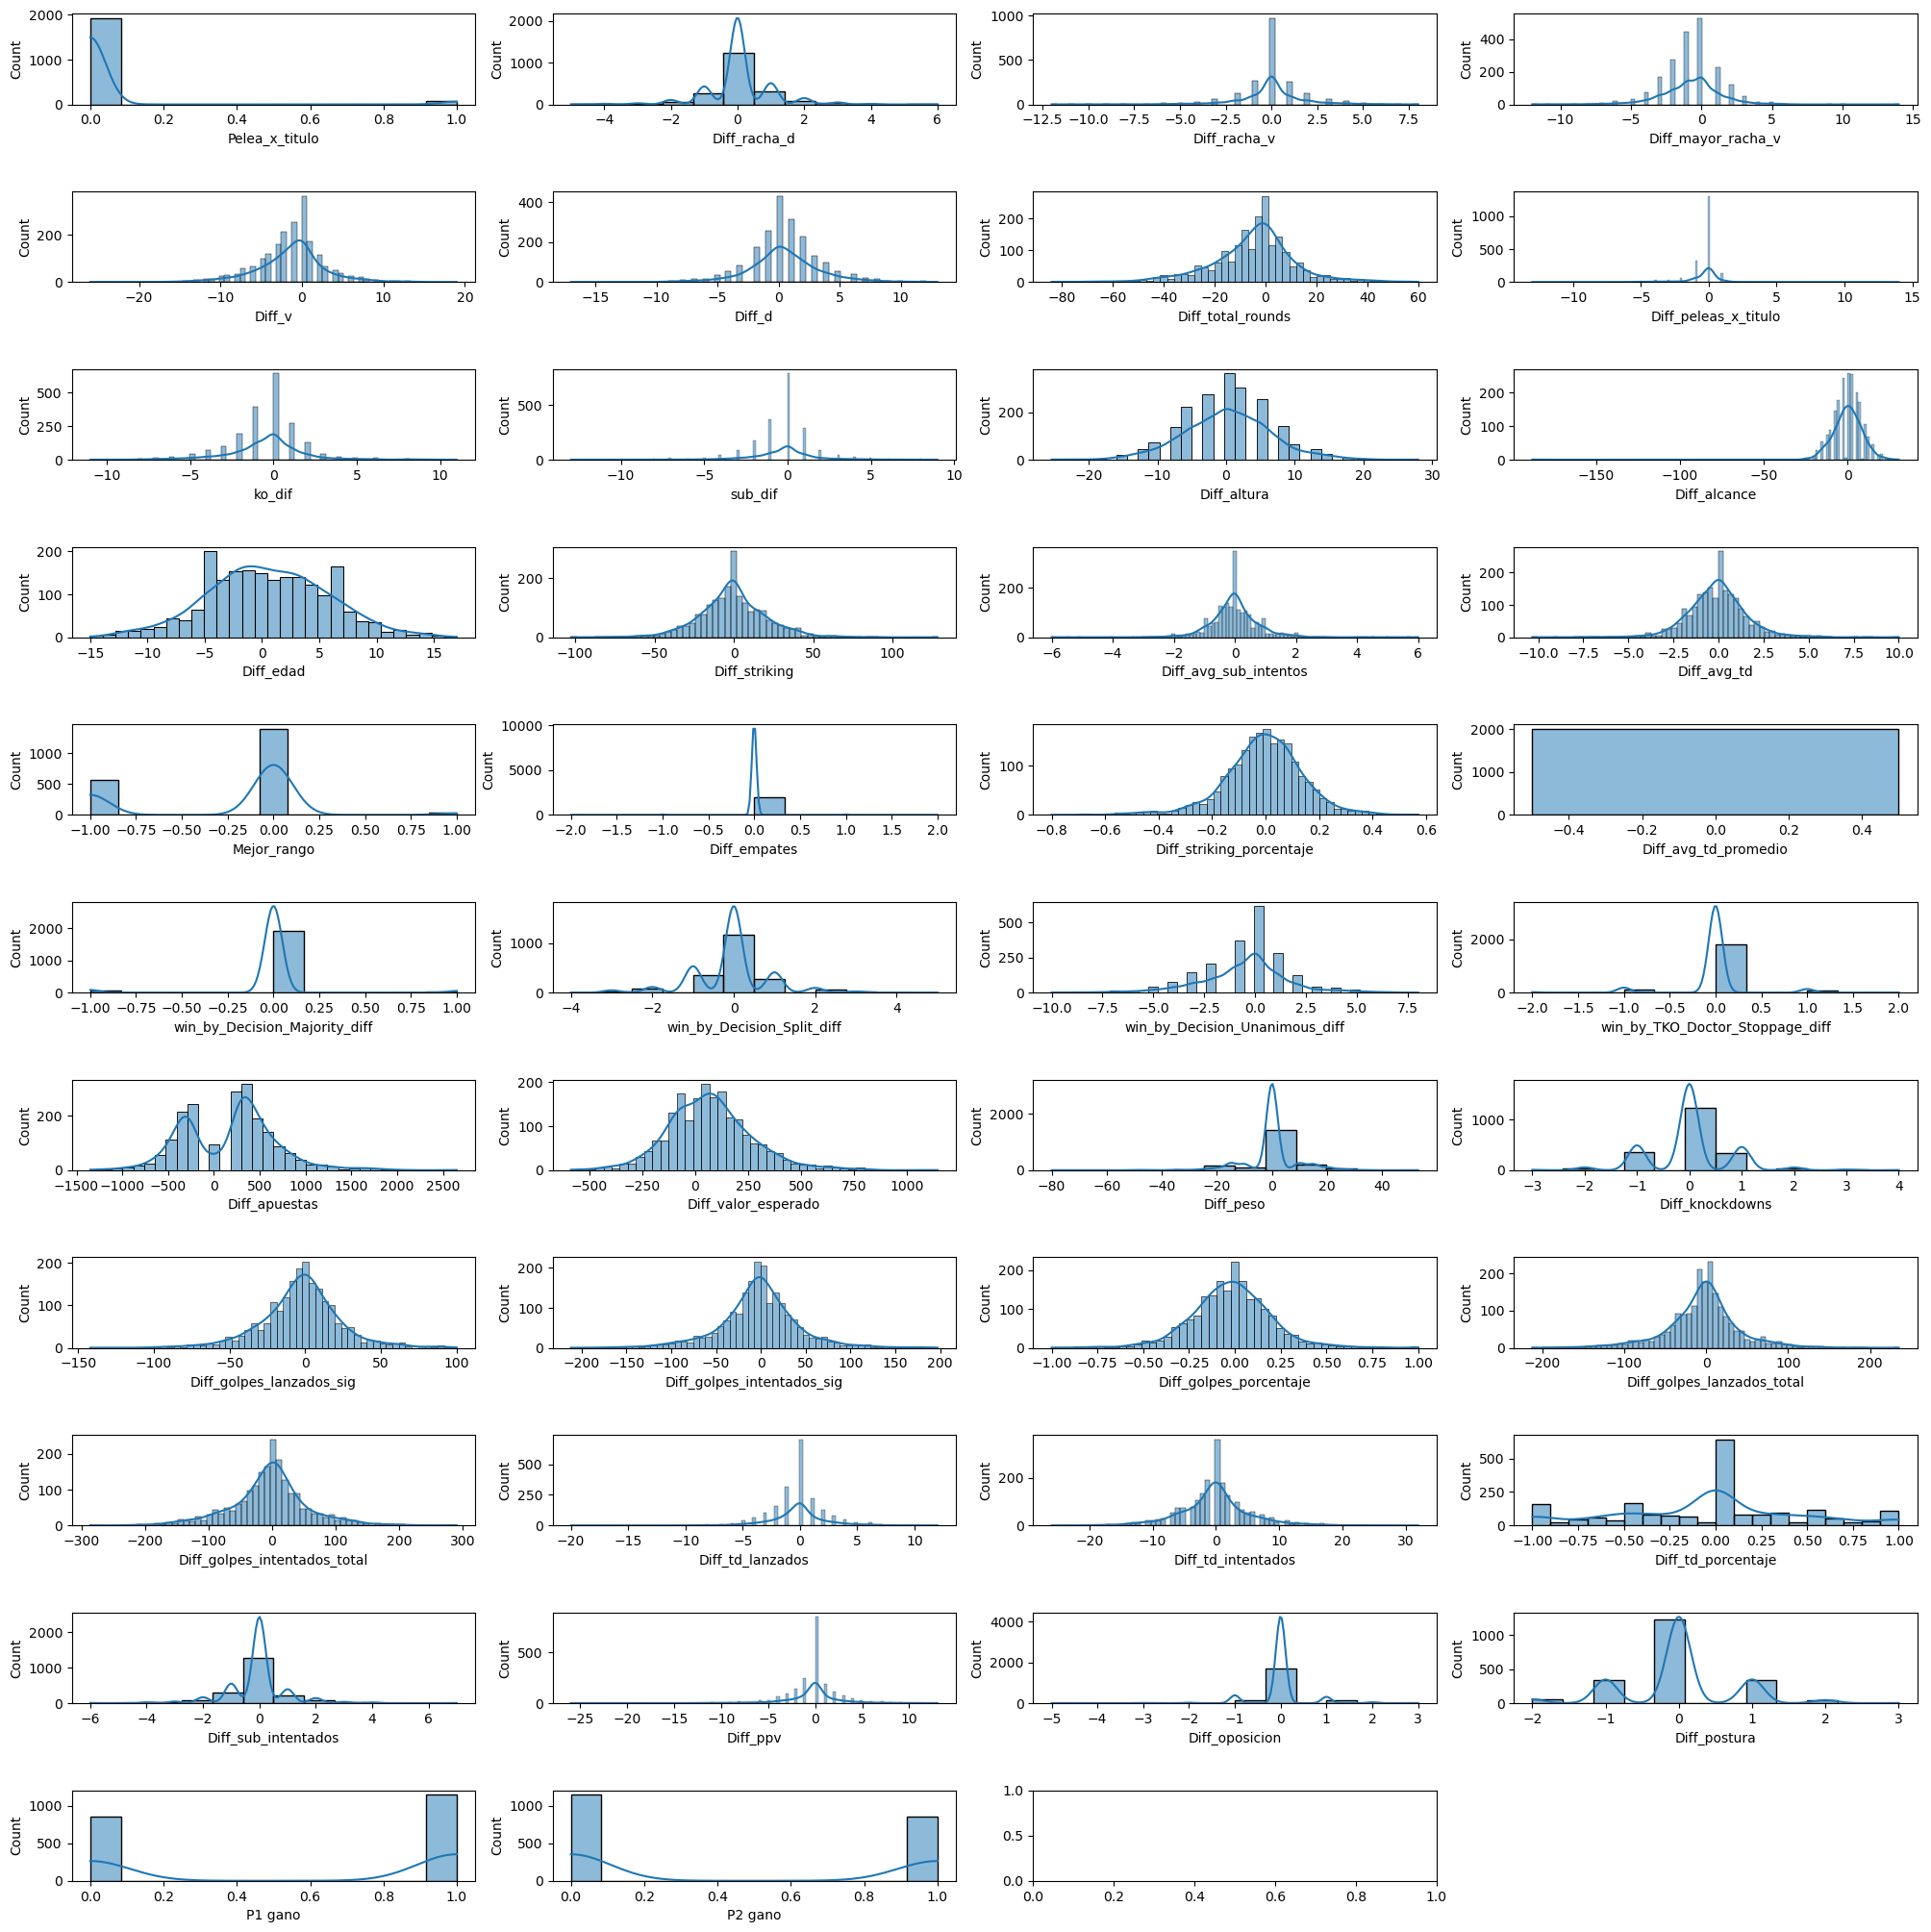

In [196]:
# HISTOGRAMAS
fig, axs = plt.subplots(ncols=4, nrows=11, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k, v in df_ultimate.drop(['Peleador1', 'Peleador2'], axis=1).items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1

for i in range(len(df_ultimate.columns) - 1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
plt.savefig('distribucion.png', dpi=300)


*DEBIDO A LA CREACION DE LAS COLUMNAS DIFERENCIADAS, PODEMOS VER QUE LA MUESTRA EN LOS GRAFICOS SE ENCUENTRA EN EL CENTRO, Y AL SER DIFERENCIA TENEMOS MUCHOS OUTLIERS EN CADA UNA DE LAS VARIABLES. (LOS CUALES SI SACAMOS, LA MUESTRA DISMINUYE CONSIDERABLEMENTE)*

**ANALISIS BIVARIADO.**

In [197]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

<Axes: >

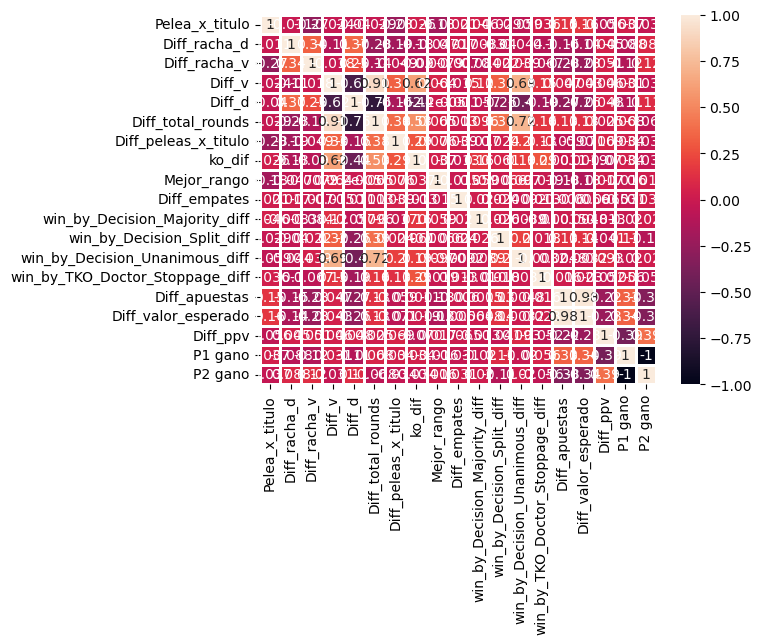

In [198]:
# VARIABLES DE RANKING.
corr = df_ultimate[['Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v' , 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif',
       'Mejor_rango', 'Diff_empates','win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado','Diff_ppv', 'P1 gano','P2 gano']].corr()
sns.heatmap(corr, annot= True, linewidths=1)

In [199]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

<Axes: >

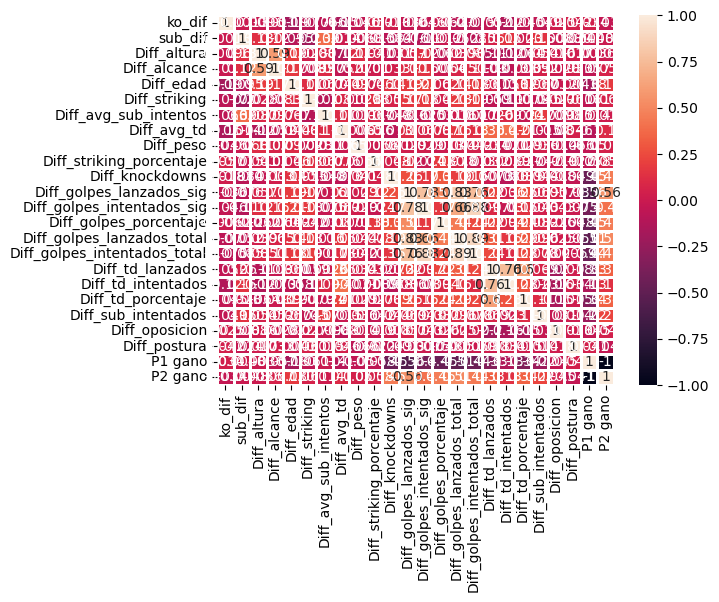

In [200]:
# VARIABLES FISICAS Y HABILIDADES.
corr = df_ultimate[['ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Diff_peso',
       'Diff_striking_porcentaje', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano']].corr()
sns.heatmap(corr, annot= True, linewidths=1)

**NO TIENE SENTIDO GRAFICAR ASI CON VARIABLES SEPARADAS PORQUE SE DISTORCIONAN LAS CORRELACIONES.**

***ESTUDIO DE OUTLIERS.***

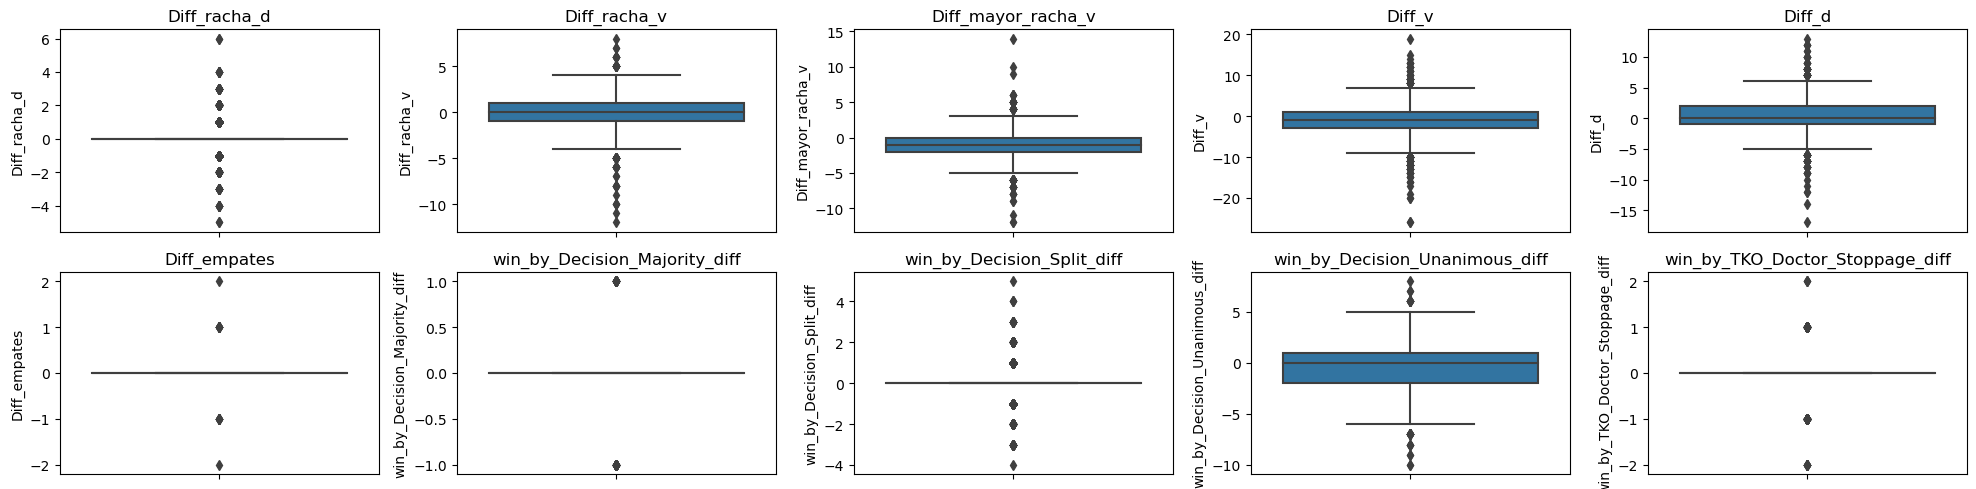

In [201]:
# VARIABLES RECORD.
interesantes1 = ['Diff_racha_d','Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d','Diff_empates','win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff']

df_interesantes1 = df_ultimate[interesantes1]
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 5))
axs = axs.flatten()

for i, variable in enumerate(interesantes1):
    sns.boxplot(y=df_interesantes1[variable], ax=axs[i])
    axs[i].set_title(variable)

plt.tight_layout()
plt.show()

In [202]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

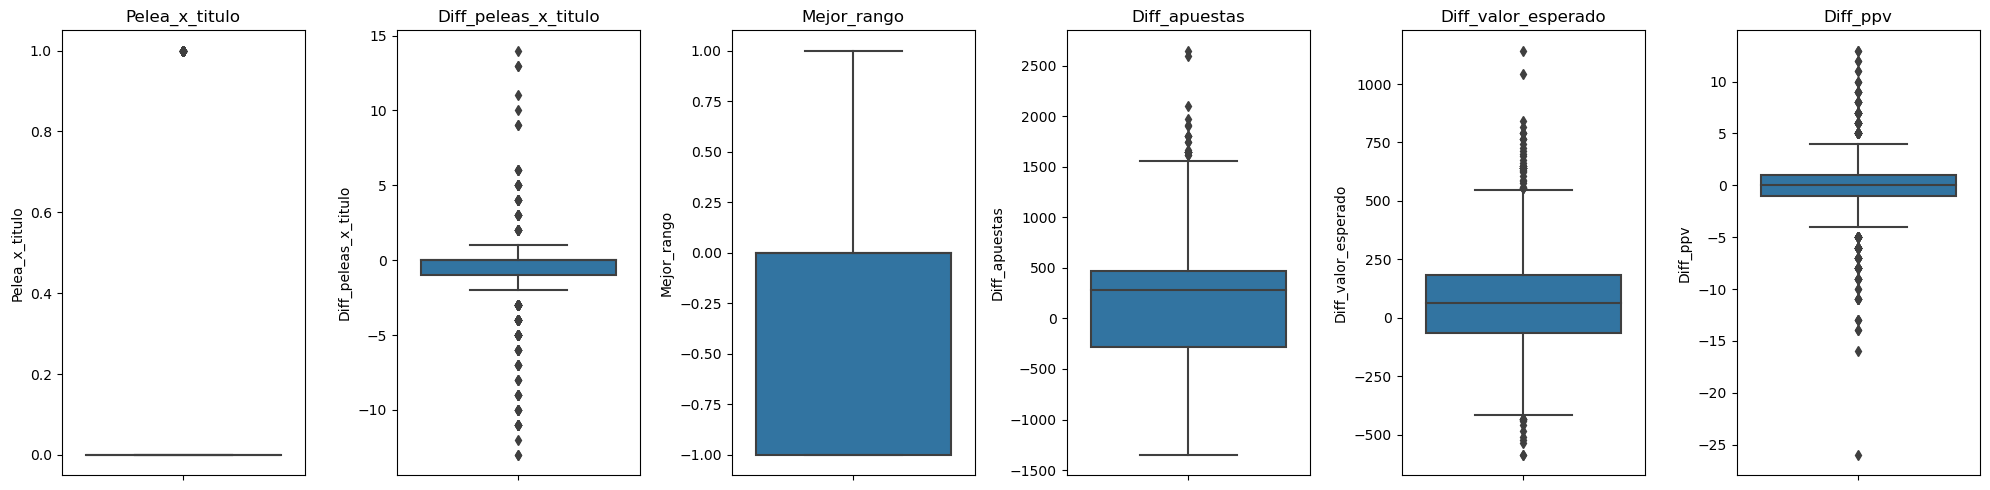

In [203]:
# VARIABLES RANKING.
interesantes2 = ['Pelea_x_titulo','Diff_peleas_x_titulo','Mejor_rango','Diff_apuestas', 'Diff_valor_esperado','Diff_ppv']

df_interesantes2 = df_ultimate[interesantes2]

fig, axs = plt.subplots(ncols=len(interesantes2), figsize=(20, 5))
axs = axs.flatten()

for i, variable in enumerate(interesantes2):
    sns.boxplot(y=df_interesantes2[variable], ax=axs[i])
    axs[i].set_title(variable)

plt.tight_layout()
plt.show()

In [204]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

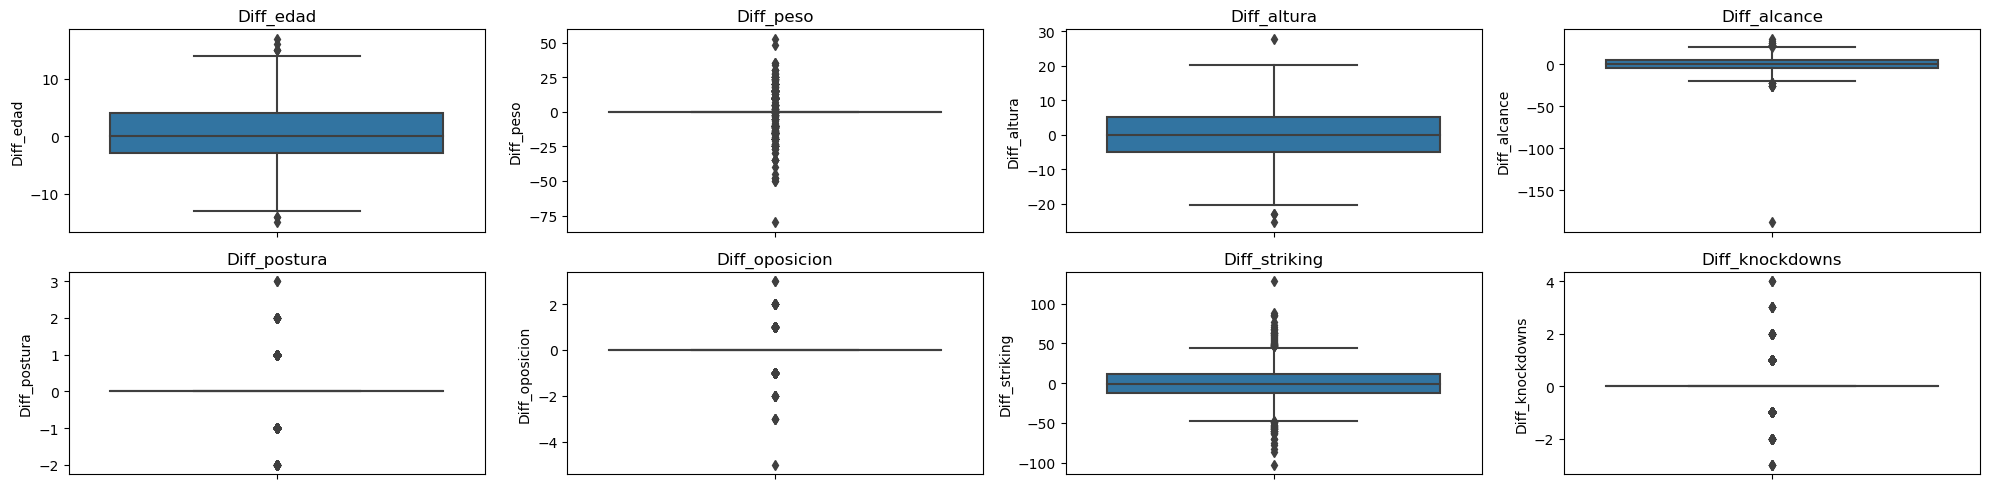

In [205]:
# VARIABLES FÍSICAS Y DE HABILIDAD.
interesantes3 = ['Diff_edad','Diff_peso','Diff_altura', 'Diff_alcance','Diff_postura','Diff_oposicion','Diff_striking','Diff_knockdowns']

df_interesantes3 = df_ultimate[interesantes3]

fig, axs = plt.subplots(ncols=4,nrows=2, figsize=(20, 5))
axs = axs.flatten()

for i, variable in enumerate(interesantes3):
    sns.boxplot(y=df_interesantes3[variable], ax=axs[i])
    axs[i].set_title(variable)

plt.tight_layout()
plt.show()

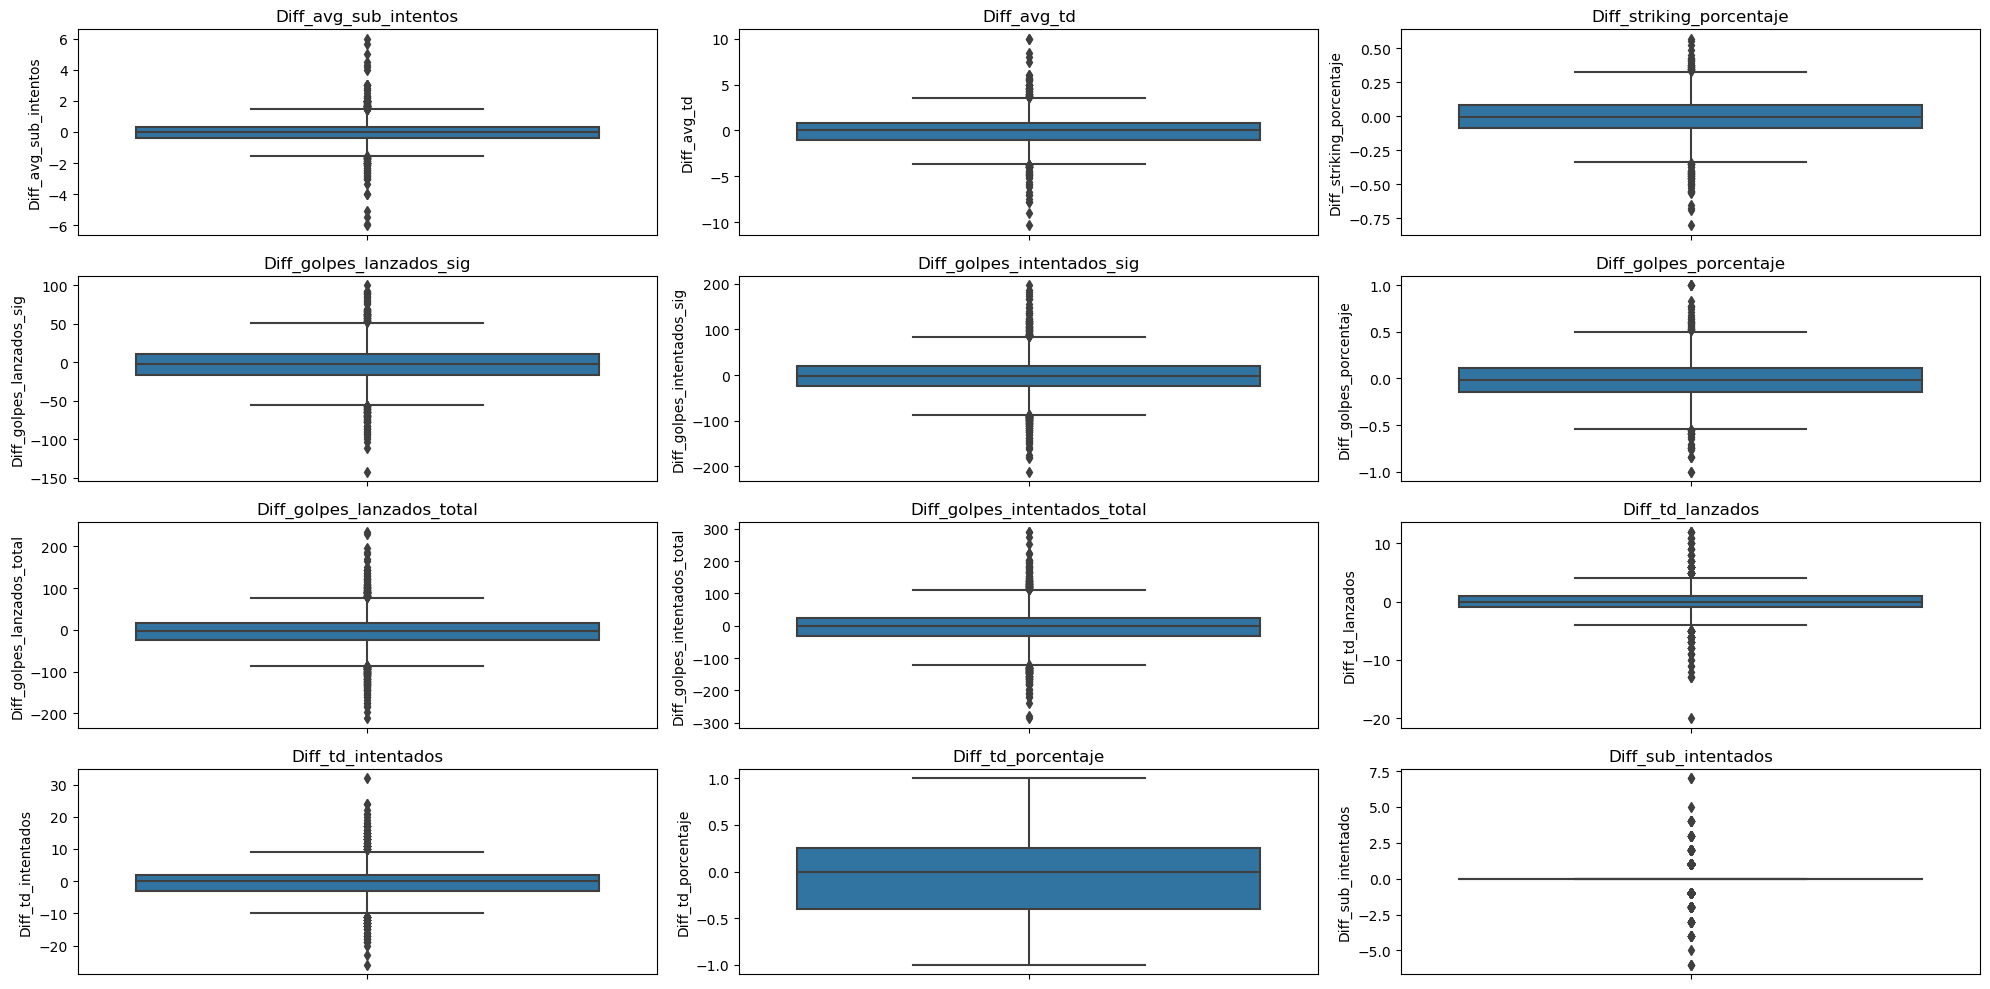

In [206]:
# VARIABLES HABILIDAD.
interesantes4 = ['Diff_avg_sub_intentos', 'Diff_avg_td','Diff_striking_porcentaje',
                 'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig','Diff_golpes_porcentaje', 
                 'Diff_golpes_lanzados_total','Diff_golpes_intentados_total', 'Diff_td_lanzados',
                 'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados']

df_interesantes4 = df_ultimate[interesantes4]

fig, axs = plt.subplots(ncols=3,nrows=4, figsize=(20, 10))
axs = axs.flatten()

for i, variable in enumerate(interesantes4):
    sns.boxplot(y=df_interesantes4[variable], ax=axs[i])
    axs[i].set_title(variable)

plt.tight_layout()
plt.show()

In [207]:
df_outliers = df_ultimate[['Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura']]

In [208]:
for i, v in df_outliers.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_ultimate)[0]
    print("Variable %s outliers = %.2f%%" % (i, perc))

Variable Pelea_x_titulo outliers = 100.00%
Variable Diff_racha_d outliers = 100.00%
Variable Diff_racha_v outliers = 6.89%
Variable Diff_mayor_racha_v outliers = 8.13%
Variable Diff_v outliers = 8.93%
Variable Diff_d outliers = 5.49%
Variable Diff_total_rounds outliers = 6.14%
Variable Diff_peleas_x_titulo outliers = 8.43%
Variable ko_dif outliers = 11.13%
Variable sub_dif outliers = 19.16%
Variable Diff_altura outliers = 0.45%
Variable Diff_alcance outliers = 2.54%
Variable Diff_edad outliers = 0.40%
Variable Diff_striking outliers = 3.49%
Variable Diff_avg_sub_intentos outliers = 6.74%
Variable Diff_avg_td outliers = 4.09%
Variable Mejor_rango outliers = 0.00%
Variable Diff_empates outliers = 100.00%
Variable Diff_striking_porcentaje outliers = 3.64%
Variable Diff_avg_td_promedio outliers = 100.00%
Variable win_by_Decision_Majority_diff outliers = 100.00%
Variable win_by_Decision_Split_diff outliers = 100.00%
Variable win_by_Decision_Unanimous_diff outliers = 1.60%
Variable win_by_TK

**EN ESTE CASO SE PRESENTAN MUCHOS OUTLIERS DEBIDO A QUE LA INGENIERIA DE VARIABLES SE HIZO A TRAVES DE UNA DIFERENCIA ENTRE DOS COLUMNAS PARA CREAR UNA.**

**AL QUITAR OUTLIERS LA PRESICION DEL MODELO SE VE DISMINUIDA.**
- Esto se debe a que el volumen de datos el muy poco.
  
- Lo recomendable es tener un porcentaje mejor de outliers en dataframe para el modelo.

In [209]:
# TODAS LAS PELEAS DE JON JONES.
df_ultimate[df_ultimate['Peleador1']== 'Jon Jones']

Peleador1             Peleador2  Pelea_x_titulo  Diff_racha_d  \
331   Jon Jones  Alexander Gustafsson               1             1   
862   Jon Jones    Ovince Saint Preux               1             0   
1339  Jon Jones       Glover Teixeira               1             0   
1454  Jon Jones  Alexander Gustafsson               1             0   
1530  Jon Jones          Chael Sonnen               1            -1   
1646  Jon Jones         Vitor Belfort               1             0   
1711  Jon Jones          Rashad Evans               1             0   
1770  Jon Jones         Lyoto Machida               1             0   

      Diff_racha_v  Diff_mayor_racha_v  Diff_v  Diff_d  Diff_total_rounds  \
331              2                  -7      -6      -2                -20   
862            -11                  -8      -8      -1                -27   
1339            -5                  -5      -8       1                -29   
1454            -3                  -3      -5       0                -18   
1530            -8                  -5      -5      -4                 -2   
1646            -5                  -4       0      -4                 -6   
1711            -2                  -1       3      -1                 17   
1770            -4                   3       1      -1                  8   

      Diff_peleas_x_titulo  ...  Diff_golpes_intentados_total  \
331                     -9  ...                         -21.0   
862                     -9  ...                          -2.0   
1339                    -7  ...                         -52.0   
1454                    -6  ...                          74.0   
1530                    -3  ...                           8.0   
1646                     0  ...                        -101.0   
1711                     0  ...                         -73.0   
1770                     1  ...                         -17.0   

      Diff_td_lanzados  Diff_td_intentados  Diff_td_porcentaje  \
331               -1.0                -5.0               -0.20   
862               -3.0                -5.0               -0.60   
1339              -3.0                -1.0               -0.50   
1454               0.0                -3.0               -0.78   
1530              -3.0                -6.0               -0.50   
1646              -1.0                -1.0               -1.00   
1711              -1.0                 2.0               -0.50   
1770              -1.0                -1.0               -0.50   

      Diff_sub_intentados  Diff_ppv  Diff_oposicion  Diff_postura  P1 gano  \
331                   0.0      -3.0             0.0             0        1   
862                   0.0      -4.0             0.0            -1        1   
1339                 -2.0       0.0             0.0             0        1   
1454                  0.0       0.0             0.0             0        1   
1530                  0.0       0.0             0.0            -1        1   
1646                  0.0      -3.0             0.0            -1        1   
1711                  0.0       0.0             0.0             0        1   
1770                 -1.0       0.0             0.0            -1        1   

      P2 gano  
331         0  
862         0  
1339        0  
1454        0  
1530        0  
1646        0  
1711        0  
1770        0  

[8 rows x 44 columns]

In [210]:
# TODAS LAS PELEAS DE BRENDAN SCHAUB.
df_ultimate[df_ultimate['Peleador1']== 'Brendan Schaub']

Peleador1        Peleador2  Pelea_x_titulo  Diff_racha_d  \
1456  Brendan Schaub    Matt Mitrione               0             0   
1560  Brendan Schaub    Lavar Johnson               0             1   
1713  Brendan Schaub     Ben Rothwell               0             0   
1915  Brendan Schaub  Gabriel Gonzaga               0            -1   
2002  Brendan Schaub    Chase Gormley               0             0   

      Diff_racha_v  Diff_mayor_racha_v  Diff_v  Diff_d  Diff_total_rounds  \
1456             0                   1       1       1                  1   
1560             0                  -2      -2       2                 -8   
1713             0                  -3      -3       0                 -2   
1915            -2                   2       5      -3                 14   
2002             0                   0       0       0                  0   

      Diff_peleas_x_titulo  ...  Diff_golpes_intentados_total  \
1456                    -1  ...                         -20.0   
1560                    -1  ...                         105.0   
1713                    -1  ...                           1.0   
1915                     0  ...                         -89.0   
2002                    -1  ...                         -35.0   

      Diff_td_lanzados  Diff_td_intentados  Diff_td_porcentaje  \
1456              -1.0                -1.0               -1.00   
1560              -4.0                -7.0                0.38   
1713               0.0                 0.0                0.00   
1915               0.0                 1.0                0.00   
2002               0.0                 2.0                0.00   

      Diff_sub_intentados  Diff_ppv  Diff_oposicion  Diff_postura  P1 gano  \
1456                 -1.0      -1.0             0.0            -2        1   
1560                 -1.0      -7.0            -1.0             0        1   
1713                  0.0       0.0             0.0             0        0   
1915                  1.0       0.0             0.0             0        1   
2002                  0.0       0.0             0.0             0        1   

      P2 gano  
1456        0  
1560        0  
1713        1  
1915        0  
2002        0  

[5 rows x 44 columns]

In [211]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

***ANALISIS MULTIVARIADO***

**PCA DE VARIABLES RECORD**

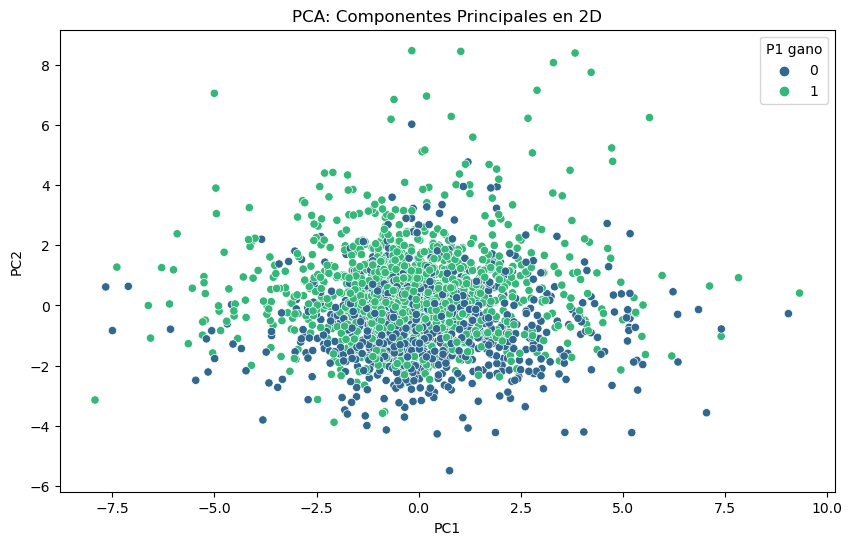

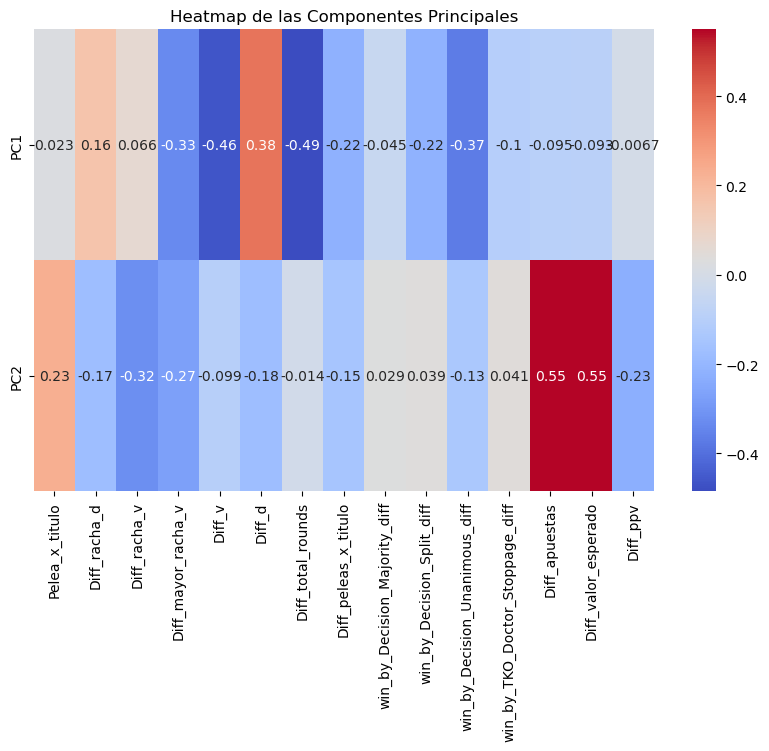

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

vars = ['Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado',
       'Diff_ppv']
x = df_ultimate.loc[:, vars].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, df_ultimate[['P1 gano']]], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='P1 gano', data=final_df, palette='viridis')
plt.title('PCA: Componentes Principales en 2D')
plt.show()

# Heatmap de las componentes principales
heatmap_data = pd.DataFrame(pca.components_, columns=vars)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'])
plt.title('Heatmap de las Componentes Principales')
plt.show()

**LAS MUESTRA SE ENCUENTRA EN EL CENTRO, DEBIDO A LAS COLUMNAS DIFERENCIADAS, Y PODEMOS VER VALORES ALEJADOS PRODUCTO DE ESA DIFERENCIACIÓN(VALORES MAXIMOS Y MINIMOS).**

***PCA HABILIDADES***

In [213]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'Diff_avg_td_promedio',
       'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff',
       'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_diff',
       'Diff_apuestas', 'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

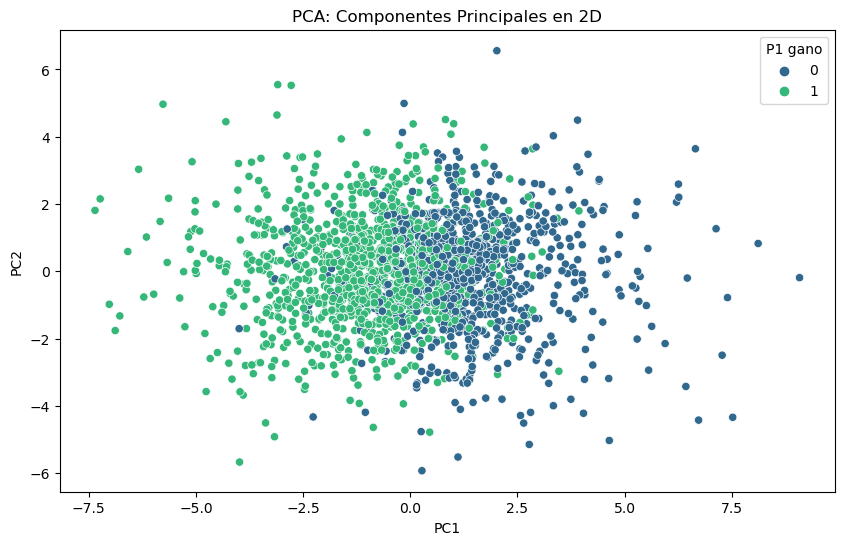

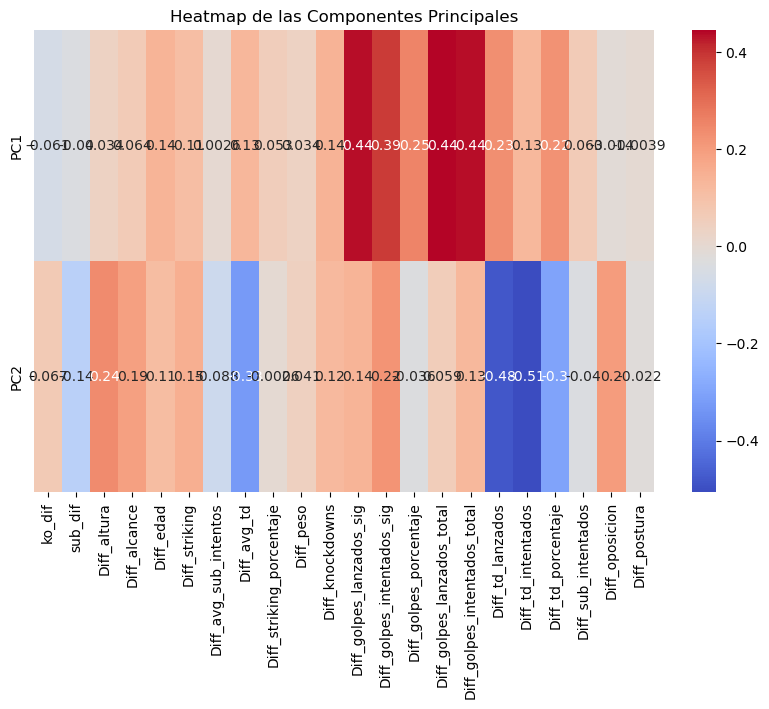

In [214]:
vars = ['ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td',
       'Diff_striking_porcentaje', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_oposicion', 'Diff_postura']
x = df_ultimate.loc[:, vars].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, df_ultimate[['P1 gano']]], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='P1 gano', data=final_df, palette='viridis')
plt.title('PCA: Componentes Principales en 2D')
plt.show()

# Heatmap de las componentes principales
heatmap_data = pd.DataFrame(pca.components_, columns=vars)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'])
plt.title('Heatmap de las Componentes Principales')
plt.show()

**SUCEDE LO MISMO QUE EN EL PCA ANTERIOR, CON LA DIFERENCIA QUE PODEMOS VER MAS VARIABLES DE CORRELACION.**

***SEGUNDO ESTUDIO DE CORRELACIONES***

In [215]:
df_correlaciones2 = df_ultimate

In [216]:
df_correlaciones2

Peleador1             Peleador2  Pelea_x_titulo  \
0                  Kamaru Usman        Jorge Masvidal               1   
1         Alexander Volkanovski          Max Holloway               1   
2                      Petr Yan             Jose Aldo               1   
3               Volkan Oezdemir        Jiri Prochazka               0   
4     Elizeu Zaleski dos Santos       Muslim Salikhov               0   
...                         ...                   ...             ...   
1999             Alessio Sakara           James Irvin               0   
2000                 Clay Guida       Shannon Gugerty               0   
2001             Eliot Marshall  Vladimir Matyushenko               0   
2002             Brendan Schaub         Chase Gormley               0   
2003               Eric Schafer           Jason Brilz               0   

      Diff_racha_d  Diff_racha_v  Diff_mayor_racha_v  Diff_v  Diff_d  \
0                0            -8                  -7       6      -7   
1                1            -8                   5       9       5   
2                2            -6                   9      12       5   
3                0            -2                  -3      -5      -3   
4                0             2                  -4      -5      -1   
...            ...           ...                 ...     ...     ...   
1999            -1            -2                   0      -1       1   
2000             1             0                  -2      -3       3   
2001             0            -2                  -1       1      -2   
2002             0             0                   0       0       0   
2003             0             0                   0      -1       2   

      Diff_total_rounds  Diff_peleas_x_titulo  ...  \
0                    27                    -2  ...   
1                    42                     6  ...   
2                    53                    14  ...   
3                   -18                    -1  ...   
4                   -17                     0  ...   
...                 ...                   ...  ...   
1999                 -5                     0  ...   
2000                -19                     0  ...   
2001                  9                     1  ...   
2002                  0                    -1  ...   
2003                 -1                     0  ...   

      Diff_golpes_intentados_total  Diff_td_lanzados  Diff_td_intentados  \
0                           -184.0              -5.0               -16.0   
1                              2.0              -3.0                -9.0   
2                           -219.0              -1.0                -1.0   
3                            -22.0               0.0                -1.0   
4                            -50.0               0.0                -1.0   
...                            ...               ...                 ...   
1999                         -13.0               0.0                 0.0   
2000                         -90.0              -2.0                -1.0   
2001                           1.0               2.0                 3.0   
2002                         -35.0               0.0                 2.0   
2003                          99.0               1.0                 3.0   

      Diff_td_porcentaje  Diff_sub_intentados  Diff_ppv  Diff_oposicion  \
0                  -0.31                  0.0      -2.0             0.0   
1                  -0.33                  0.0       0.0             0.0   
2                  -0.50                  0.0      -1.0             0.0   
3                   0.00                  0.0       0.0             0.0   
4                   0.00                  0.0      -1.0             0.0   
...                  ...                  ...       ...             ...   
1999                0.00                  0.0       0.0             0.0   
2000               -1.00                  2.0      -6.0             0.0   
2001                0.66                  0

In [217]:
correlaciones = [col for col in df_correlaciones2.columns if df_correlaciones2[col].dtype == 'int64' or df_correlaciones2[col].dtype == 'float64']
corr_dict = {}

In [219]:
for col in correlaciones:
    corr_dict[col] = abs(df_correlaciones2[col].corr(df_correlaciones2['P1 gano']))

In [220]:
for w in sorted(corr_dict, key=corr_dict.get, reverse=True):
    print(w, corr_dict[w])


Diff_avg_td_promedio nan
P1 gano 1.0
P2 gano 1.0
Diff_golpes_lanzados_sig 0.5554544954946081
Diff_golpes_lanzados_total 0.5055605922310936
Diff_golpes_porcentaje 0.45412737146757326
Diff_knockdowns 0.4489023364602268
Diff_golpes_intentados_total 0.4421154334017911
Diff_golpes_intentados_sig 0.4039843441549991
Diff_ppv 0.3927070694403665
Diff_td_porcentaje 0.33772740124859973
Diff_valor_esperado 0.3376391964976387
Diff_apuestas 0.33223040444991625
Diff_td_lanzados 0.3290612829019565
Diff_sub_intentados 0.21974077655617474
Diff_edad 0.17848923585779403
Diff_td_intentados 0.13409428836349022
Diff_racha_v 0.11917821321378953
Diff_d 0.11479944860606861
win_by_Decision_Split_diff 0.10819170758916634
Diff_avg_td 0.10019329339254653
Diff_racha_d 0.08838242387010066
Diff_total_rounds 0.06783125035936441
Diff_striking 0.0610515428221601
Diff_striking_porcentaje 0.0575456019601113
Diff_alcance 0.056703882436097836
win_by_TKO_Doctor_Stoppage_diff 0.055788045410399716
Diff_peso 0.050038258386592926

In [221]:
# SE ELIMINA VARIABLE SIN RELEVANCIA.
df_ultimate = df_ultimate.drop(columns ='Diff_avg_td_promedio', axis= 1)

In [222]:
df_ultimate.T

0                      1     \
Peleador1                          Kamaru Usman  Alexander Volkanovski   
Peleador2                        Jorge Masvidal           Max Holloway   
Pelea_x_titulo                                1                      1   
Diff_racha_d                                  0                      1   
Diff_racha_v                                 -8                     -8   
Diff_mayor_racha_v                           -7                      5   
Diff_v                                        6                      9   
Diff_d                                       -7                      5   
Diff_total_rounds                            27                     42   
Diff_peleas_x_titulo                         -2                      6   
ko_dif                                        5                      6   
sub_dif                                       0                      2   
Diff_altura                               -2.54                   12.7   
Diff_alcance                              -5.08                  -5.08   
Diff_edad                                    -3                     -3   
Diff_striking                             -0.27                   0.51   
Diff_avg_sub_intentos                       0.2                    0.0   
Diff_avg_td                               -1.74                  -1.92   
Mejor_rango                                  -1                     -1   
Diff_empates                                  0                      0   
Diff_striking_porcentaje                  -0.05                  -0.13   
win_by_Decision_Majority_diff                 0                      0   
win_by_Decision_Split_diff                    1                      1   
win_by_Decision_Unanimous_diff                0                      0   
win_by_TKO_Doctor_Stoppage_diff               0                      0   
Diff_apuestas                               430                    380   
Diff_valor_esperado                  148.333333             122.380952   
Diff_peso                                     0                      0   
Diff_knockdowns                             0.0                    0.0   
Diff_golpes_lanzados_sig                  -28.0                  -35.0   
Diff_golpes_intentados_sig                -26.0                   -4.0   
Diff_golpes_porcentaje                     -0.1                  -0.12   
Diff_golpes_lanzados_total               -175.0                  -28.0   
Diff_golpes_intentados_total             -184.0                    2.0   
Diff_td_lanzados                           -5.0                   -3.0   
Diff_td_intentados                        -16.0                   -9.0   
Diff_td_porcentaje                        -0.31                  -0.33   
Diff_sub_intentados                         0.0                    0.0   
Diff_ppv                                   -2.0                    0.0   
Diff_oposicion                              0.0                    0.0   
Diff_postura                                  2                      0   
P1 gano                                       1                      1   
P2 gano                                       0                      0   

                                       2                3     \
Peleador1                          Petr Yan  Volkan Oezdemir   
Peleador2                         Jose Aldo   Jiri Prochazka   
Pelea_x_titulo                            1                0   
Diff_racha_d                              2                0   
Diff_racha_v                             -6               -2   
Diff_mayor_racha_v                        9               -3   
Diff_v                                   12               -5   
Diff_d                                    5               -3   
Diff_total_rounds                        53              -18   
Diff_peleas_x_titulo                     14               -1   
ko_dif                                    8               -3   
sub_dif           

<Axes: >

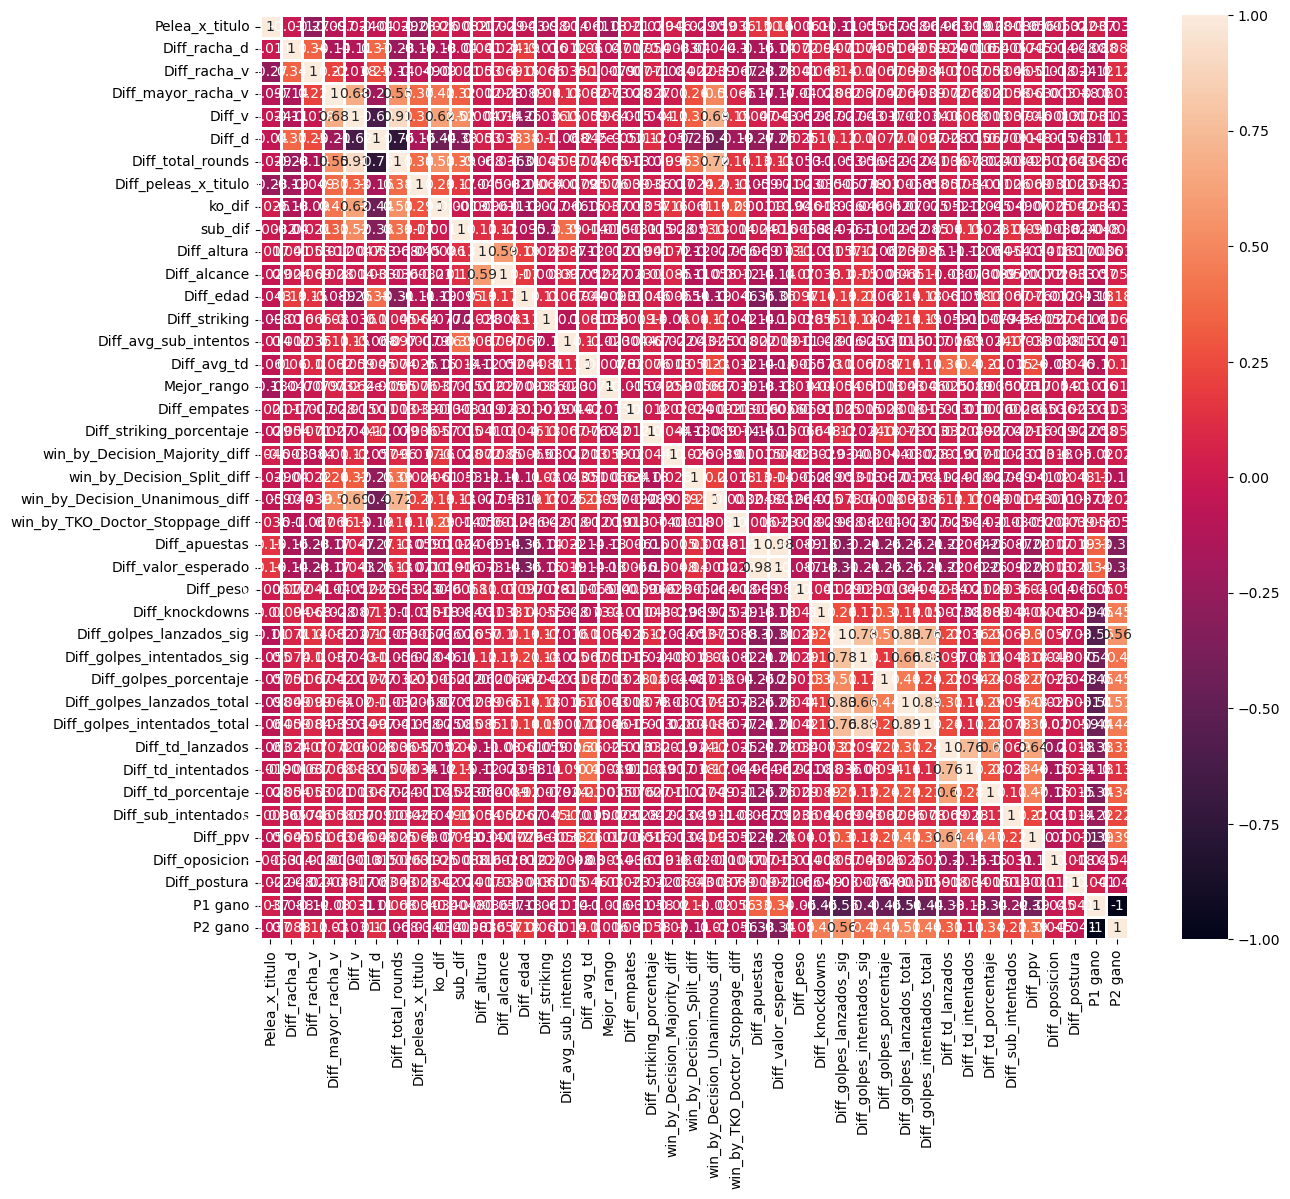

In [223]:
# MAPA DE CORRELACIONES GENERAL POCO LEGIBLE.
corr = df_ultimate[['Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'win_by_Decision_Majority_diff',
       'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff',
       'win_by_TKO_Doctor_Stoppage_diff', 'Diff_apuestas',
       'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano']].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot= True, linewidths=1)

In [224]:
filtered_corr_dict = {key: value for key, value in corr_dict.items() if not np.isnan(value)}

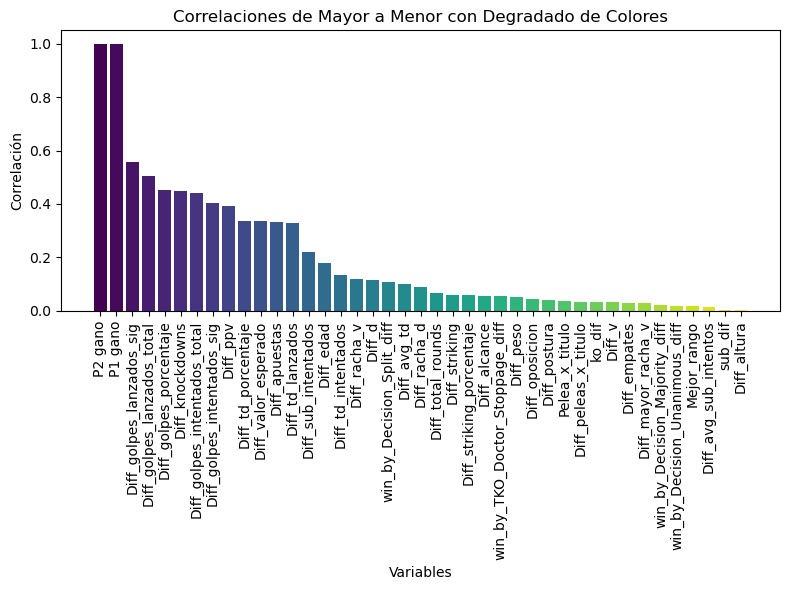

In [225]:
# CORRELACIONES EN GRAFICO DE BARRAS.
variables = list(filtered_corr_dict.keys())
correlations = list(filtered_corr_dict.values())

sorted_variables = [x for _, x in sorted(zip(correlations, variables), reverse=True)]
sorted_correlations = sorted(correlations, reverse=True)

colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_correlations)))

plt.figure(figsize=(8, 6))
plt.bar(sorted_variables, sorted_correlations, color=colors)

plt.xlabel("Variables")
plt.ylabel("Correlación")

plt.title("Correlaciones de Mayor a Menor con Degradado de Colores")

plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

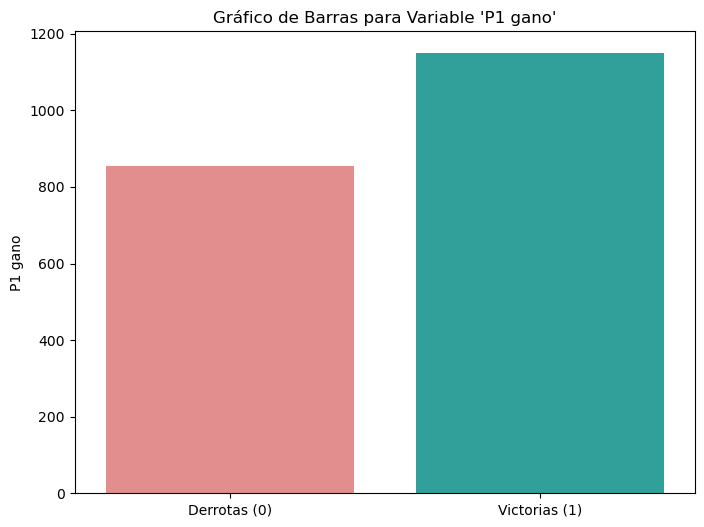

<Figure size 640x480 with 0 Axes>

In [226]:
# DISTRIBUCIÓN VARIABLE TARGET.
data = df_ultimate['P1 gano']
counts = data.value_counts()
colors = ["lightcoral", "lightseagreen"]

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts, palette=colors)
plt.xticks(ticks=[0, 1], labels=["Derrotas (0)", "Victorias (1)"])
plt.title("Gráfico de Barras para Variable 'P1 gano'")
plt.show()
plt.savefig('target.png',dpi=300)



In [227]:
victorias_p1 = df_ultimate[df_ultimate['P1 gano'] == 1]

peleadores = victorias_p1.groupby('Peleador1')['P1 gano'].count()


In [228]:
data_p = pd.DataFrame(peleadores)

In [229]:
data_p = data_p.reset_index()

In [230]:
data_p = data_p.rename(columns={'Peleador1':'Luchador 1','P1 gano':'Victorias'})

In [231]:
data_p

Luchador 1  Victorias
0         Aaron Riley          1
1       Aaron Simpson          1
2       Abel Trujillo          1
3     Akira Corassani          1
4         Al Iaquinta          2
..                ...        ...
510      Yves Edwards          1
511      Yves Jabouin          4
512     Zach Makovsky          1
513      Zak Cummings          3
514  Zubaira Tukhugov          1

[515 rows x 2 columns]

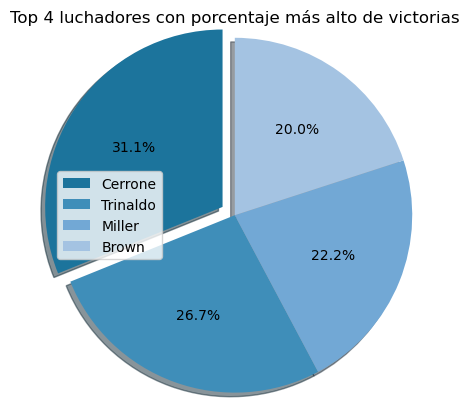

In [232]:
# GRAFICO PARA DOCUMENTO.
cerrone = data_p[data_p['Luchador 1'] == 'Donald Cerrone']
trinaldo = data_p[data_p['Luchador 1'] == 'Francisco Trinaldo']
miller = data_p[data_p['Luchador 1'] == 'Jim Miller']
brown = data_p[data_p['Luchador 1'] == 'Matt Brown']
c_v = cerrone['Victorias'].sum()
t_v = trinaldo['Victorias'].sum()
m_v = miller['Victorias'].sum()
b_v = brown['Victorias'].sum()

valores = [c_v, t_v, m_v, b_v]
etiquetas = ['Cerrone', 'Trinaldo', 'Miller', 'Brown']

colores = ['#1C749C','#3F8EB9','#72A8D5','#A4C3E2' ]

plt.pie(valores, colors=colores, startangle=90, shadow=True, explode=(0.1, 0, 0, 0), radius=1.2, autopct='%1.1f%%')
plt.legend(etiquetas)
plt.title('Top 4 luchadores con porcentaje más alto de victorias')
plt.show()


# ***APLICACION DE TODOS LOS MODELOS***

In [233]:
# ALGORITMOS
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

**VARIABLE TARGET : P1 GANO**

In [236]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'win_by_Decision_Majority_diff',
       'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff',
       'win_by_TKO_Doctor_Stoppage_diff', 'Diff_apuestas',
       'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

In [237]:
df_ultimate.head(5)

Peleador1        Peleador2  Pelea_x_titulo  Diff_racha_d  \
0               Kamaru Usman   Jorge Masvidal               1             0   
1      Alexander Volkanovski     Max Holloway               1             1   
2                   Petr Yan        Jose Aldo               1             2   
3            Volkan Oezdemir   Jiri Prochazka               0             0   
4  Elizeu Zaleski dos Santos  Muslim Salikhov               0             0   

   Diff_racha_v  Diff_mayor_racha_v  Diff_v  Diff_d  Diff_total_rounds  \
0            -8                  -7       6      -7                 27   
1            -8                   5       9       5                 42   
2            -6                   9      12       5                 53   
3            -2                  -3      -5      -3                -18   
4             2                  -4      -5      -1                -17   

   Diff_peleas_x_titulo  ...  Diff_golpes_intentados_total  Diff_td_lanzados  \
0                    -2  ...                        -184.0              -5.0   
1                     6  ...                           2.0              -3.0   
2                    14  ...                        -219.0              -1.0   
3                    -1  ...                         -22.0               0.0   
4                     0  ...                         -50.0               0.0   

   Diff_td_intentados  Diff_td_porcentaje  Diff_sub_intentados  Diff_ppv  \
0               -16.0               -0.31                  0.0      -2.0   
1                -9.0               -0.33                  0.0       0.0   
2                -1.0               -0.50                  0.0      -1.0   
3                -1.0                0.00                  0.0       0.0   
4                -1.0                0.00                  0.0      -1.0   

   Diff_oposicion  Diff_postura  P1 gano  P2 gano  
0             0.0             2        1        0  
1             0.0             0        1        0  
2             0.0             2        1        0  
3             0.0             0        0        1  
4             0.0             0        0        1  

[5 rows x 43 columns]

In [238]:
X_ufc = df_ultimate.drop(['Peleador1', 'Peleador2','P1 gano','P2 gano'], axis=1)
y_ufc = df_ultimate['P1 gano']

In [239]:
X_train, X_test, y_train , y_test = train_test_split(X_ufc, y_ufc, stratify=y_ufc, test_size = 0.30, random_state=42)

REGRESIÓN LOGISTICA

C : 1 Training set accuracy: 0.888
C : 1 Test set accuracy: 0.870
C : 1 Training set F1-score: 0.903
C : 1 Test set F1-score: 0.886


C : 10 Training set accuracy: 0.891
C : 10 Test set accuracy: 0.872
C : 10 Training set F1-score: 0.905
C : 10 Test set F1-score: 0.887


C : 100 Training set accuracy: 0.892
C : 100 Test set accuracy: 0.872
C : 100 Training set F1-score: 0.906
C : 100 Test set F1-score: 0.887


C : 0.1 Training set accuracy: 0.890
C : 0.1 Test set accuracy: 0.872
C : 0.1 Training set F1-score: 0.905
C : 0.1 Test set F1-score: 0.888


C : 0.01 Training set accuracy: 0.879
C : 0.01 Test set accuracy: 0.867
C : 0.01 Training set F1-score: 0.896
C : 0.01 Test set F1-score: 0.884




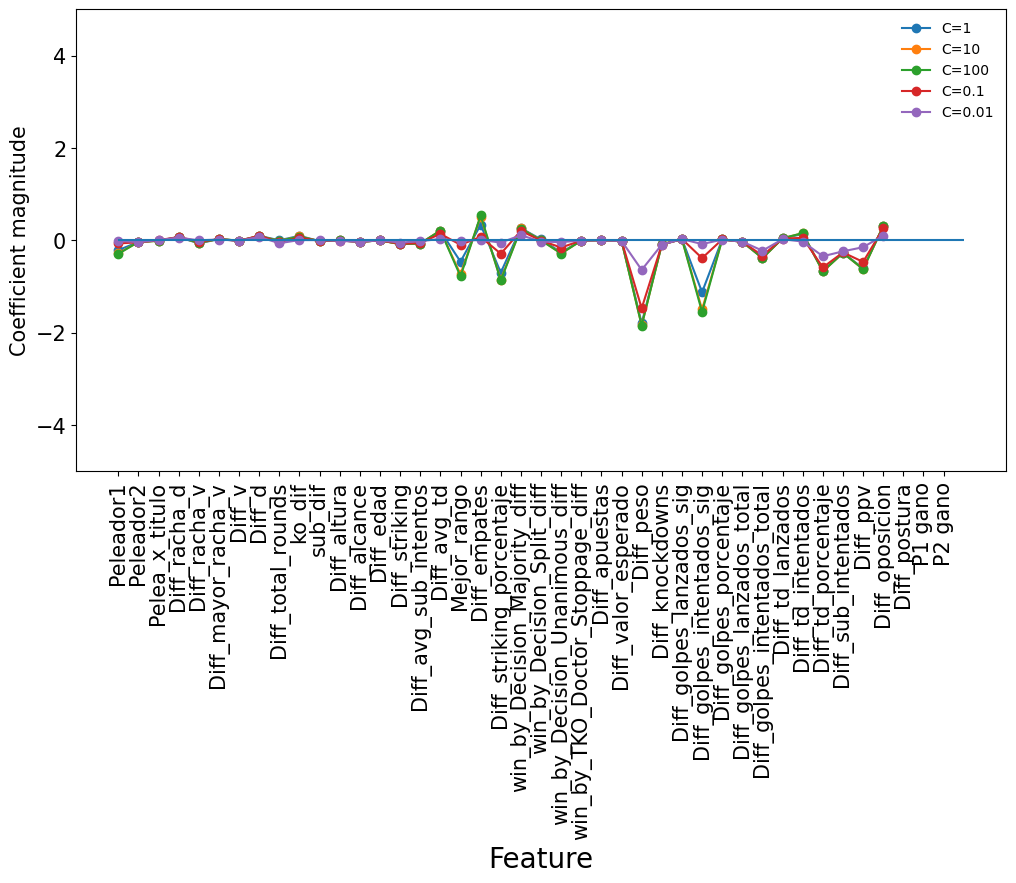

In [240]:
plt.figure(figsize=(12, 6))
Clist = [1, 10, 100, 0.1, 0.01]

for C in Clist:
    logreg = LogisticRegression(C=C, solver='newton-cg').fit(X_train, y_train)
    y_train_pred = logreg.predict(X_train)
    y_pred = logreg.predict(X_test)

    print('C : {} Training set accuracy: {:.3f}'.format(C, accuracy_score(y_train, y_train_pred)))
    print('C : {} Test set accuracy: {:.3f}'.format(C, accuracy_score(y_test, y_pred)))

    print('C : {} Training set F1-score: {:.3f}'.format(C, f1_score(y_train, y_train_pred)))
    print('C : {} Test set F1-score: {:.3f}'.format(C, f1_score(y_test, y_pred)))
    print('\n')

    df_ultimate_features = [x for i, x in enumerate(df_ultimate.columns) if i != 9]
    plt.plot(logreg.coef_.T, marker='o', label=f"C={C}")

plt.xticks(range(len(df_ultimate_features)), df_ultimate_features, rotation=90)

plt.hlines(0, 0, len(df_ultimate_features))
plt.ylim(-5, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Feature", size=20)
plt.ylabel("Coefficient magnitude", size=15)
plt.legend(frameon=False)
plt.show()


In [241]:
logreg = LogisticRegression(C=100,solver='newton-cg').fit(X_train,y_train)
y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

logreg_train_accuracy = accuracy_score(y_train, y_train_pred)
logreg_test_accuracy = accuracy_score(y_test, y_pred)
logreg_train_f1_score = f1_score(y_train, y_train_pred)
logreg_test_f1_score = f1_score(y_test, y_pred)

print('Accuracy en Entrenamiento: {:.3f}'.format(logreg_train_accuracy))
print('Accuracy en Test: {:.3f}'.format(logreg_test_accuracy))

print('F1-score en entrenamiento: {:.3f}'.format(logreg_train_f1_score))
print('F1-score en Test: {:.3f}'.format(logreg_test_f1_score))

Accuracy en Entrenamiento: 0.892
Accuracy en Test: 0.872
F1-score en entrenamiento: 0.906
F1-score en Test: 0.887


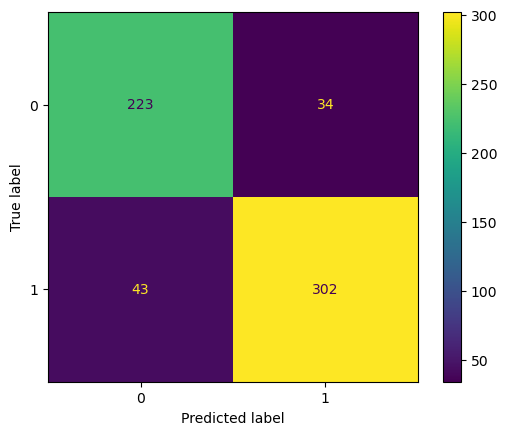

In [242]:
cm = confusion_matrix(y_test, y_pred, labels= logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg.classes_)
disp.plot()
plt.show()

**ARBOL DE DECISIÓN**

In [243]:
max_depth=range(1,5)
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth : 
    arbol = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

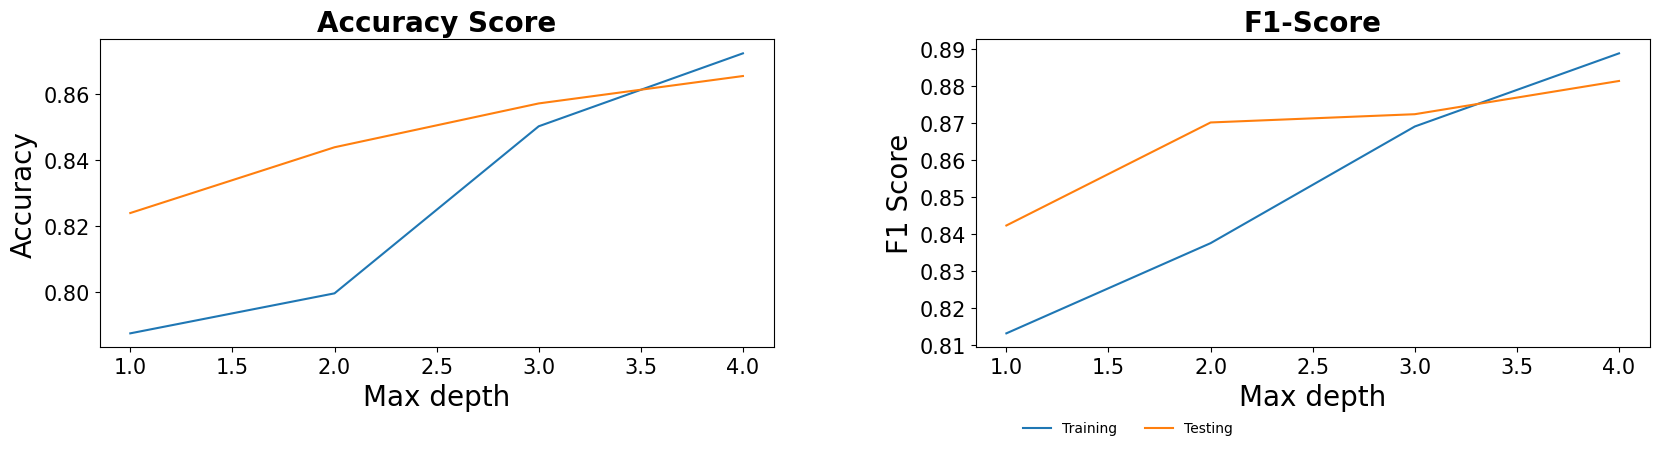

In [244]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);

In [245]:
arbol = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_train_pred = arbol.predict(X_train)
y_pred=arbol.predict(X_test)


arbol_train_accuracy = accuracy_score(y_train, y_train_pred)
arbol_test_accuracy = accuracy_score(y_test, y_pred)
arbol_train_f1_score = f1_score(y_train, y_train_pred)
arbol_test_f1_score = f1_score(y_test, y_pred)

print('Accuracy en Entrenamiento: {:.3f}'.format(arbol_train_accuracy))
print('Accuracy en Test: {:.3f}'.format(arbol_test_accuracy))

print('F1-score en entrenamiento: {:.3f}'.format(arbol_train_f1_score))
print('F1-score en Test: {:.3f}'.format(arbol_test_f1_score))

Accuracy en Entrenamiento: 0.850
Accuracy en Test: 0.857
F1-score en entrenamiento: 0.869
F1-score en Test: 0.872


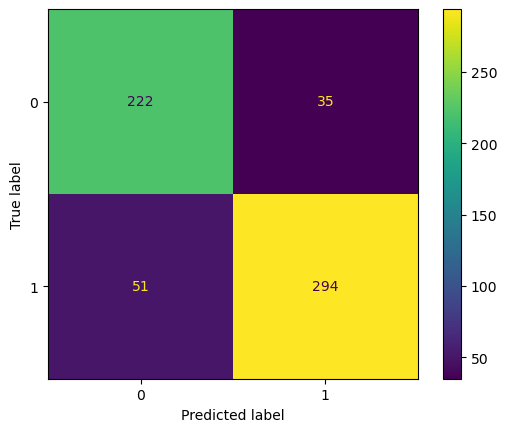

In [246]:
cm = confusion_matrix(y_test, y_pred, labels= arbol.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=arbol.classes_)
disp.plot()
plt.show()

**KNN (K-nearest neighbour)**

In [247]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

vecinos = range(2,10)

for vecino in vecinos:
    print(f'Evaluando cantidad de vecinos {vecinos}')
    knn = KNeighborsClassifier(n_neighbors=vecino)
    knn.fit(X_train, y_train)
    
    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

Evaluando cantidad de vecinos range(2, 10)


Evaluando cantidad de vecinos range(2, 10)
Evaluando cantidad de vecinos range(2, 10)
Evaluando cantidad de vecinos range(2, 10)
Evaluando cantidad de vecinos range(2, 10)
Evaluando cantidad de vecinos range(2, 10)
Evaluando cantidad de vecinos range(2, 10)
Evaluando cantidad de vecinos range(2, 10)


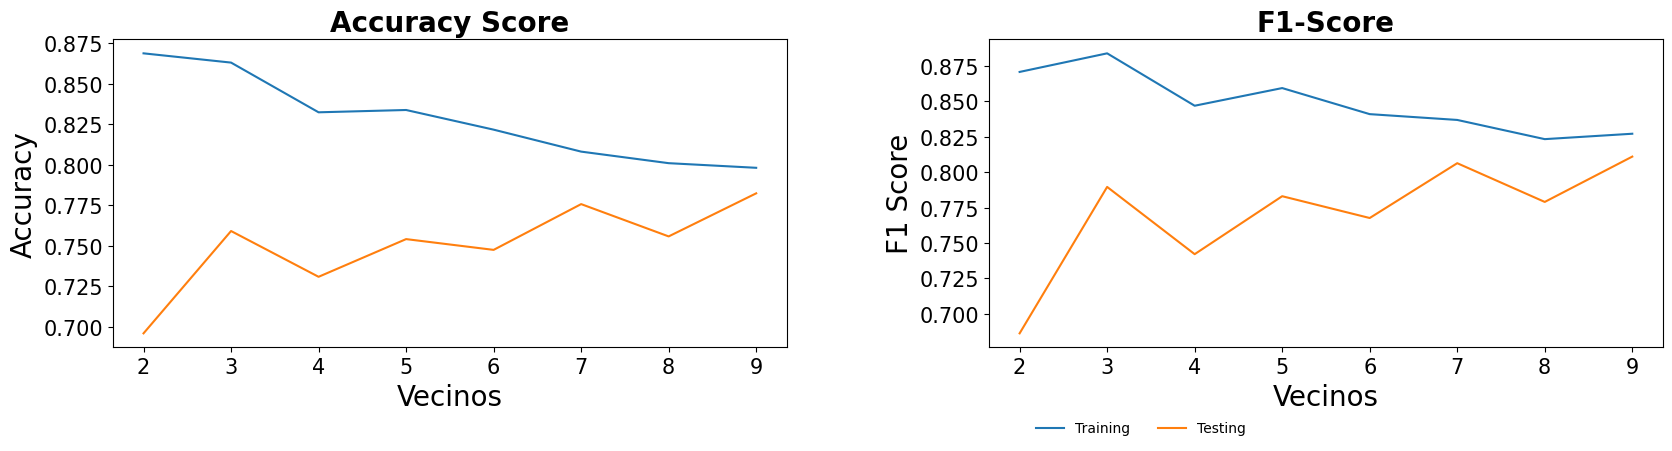

In [248]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(vecinos, training_accuracy, label='training accuracy')
plt.plot(vecinos, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Vecinos',size=20)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(vecinos, training_f1)
plt.plot(vecinos, test_f1)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Vecinos',size=20)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);

In [249]:
knn = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)
y_train_pred = arbol.predict(X_train)
y_pred = knn.predict(X_test)

knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_test_accuracy = accuracy_score(y_test, y_pred)
knn_train_f1_score = f1_score(y_train, y_train_pred)
knn_test_f1_score = f1_score(y_test, y_pred)


print('Accuracy en Entrenamiento: {:.3f}'.format(knn_train_accuracy))
print('Accuracy en Test: {:.3f}'.format(knn_test_accuracy))

print('F1-score en entrenamiento: {:.3f}'.format(knn_train_f1_score))
print('F1-score en Test: {:.3f}'.format(knn_test_f1_score))

Accuracy en Entrenamiento: 0.850
Accuracy en Test: 0.761
F1-score en entrenamiento: 0.869
F1-score en Test: 0.795


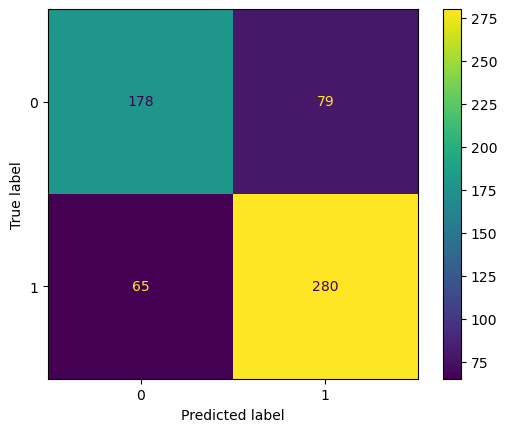

In [250]:
cm = confusion_matrix(y_test, y_pred)
#, labels= k_vecinos.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

**RANDOM FOREST**

In [251]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

#estimadores = [10,50,100,150,200]
profundidad = [1,3,5,7]
for prof in profundidad:
    print(f'Evaluando con profundidad {prof}')
    rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth = prof)
    rf.fit(X_train, y_train)
    
    y_train_pred=rf.predict(X_train)
    y_pred=rf.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

Evaluando con profundidad 1
Evaluando con profundidad 3
Evaluando con profundidad 5
Evaluando con profundidad 7


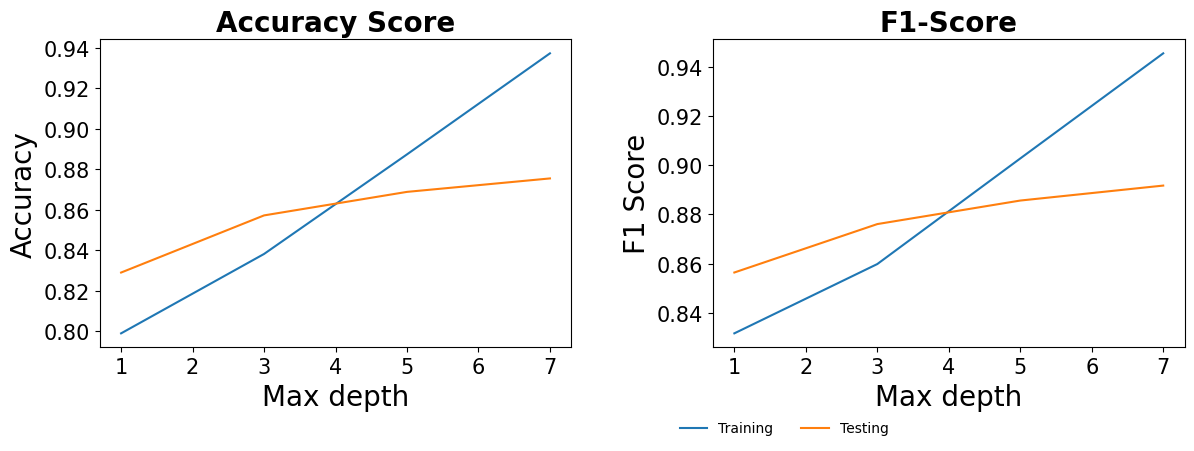

In [252]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(profundidad, training_accuracy, label='training accuracy')
plt.plot(profundidad, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(profundidad, training_f1)
plt.plot(profundidad, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.4,-0.2), ncol=2);

In [253]:
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth = 3).fit(X_train,y_train)
  
y_train_pred=rf.predict(X_train)
y_pred=rf.predict(X_test)
    
rf_train_accuracy = accuracy_score(y_train,y_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_pred)
   
rf_train_f1_score = f1_score(y_train,y_train_pred)
rf_test_f1_score = f1_score(y_test, y_pred)


print('Accuracy en Entrenamiento: {:.3f}'.format(rf_train_accuracy))
print('Accuracy en Test: {:.3f}'.format(rf_test_accuracy))

print('F1-score en entrenamiento: {:.3f}'.format(rf_train_f1_score))
print('F1-score en Test: {:.3f}'.format(rf_test_f1_score))

Accuracy en Entrenamiento: 0.838
Accuracy en Test: 0.857
F1-score en entrenamiento: 0.860
F1-score en Test: 0.876


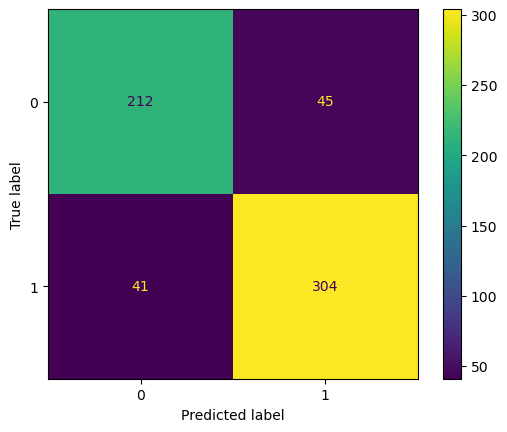

In [254]:
cm = confusion_matrix(y_test, y_pred, labels= rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()


**SVM CLASSIFIER (SUPPORT VECTOR MACHINE)**

In [255]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC(C=100, gamma='auto', kernel = 'linear').fit(X_train_scaled, y_train)

y_train_pred=svc.predict(X_train_scaled)
y_pred=svc.predict(X_test_scaled)

svc_train_accuracy = accuracy_score(y_train_pred,y_train)
svc_test_accuracy = accuracy_score(y_pred, y_test)
svc_train_f1_score = f1_score(y_train_pred, y_train)
svc_test_f1_score = f1_score(y_pred, y_test)

print("Accuracy on train: {:.3f}".format(svc_train_accuracy))
print("Accuracy on test: {:.3f}".format(svc_test_accuracy))
print("F1-score en Entrenamiento: {:.3f}".format(svc_train_f1_score))
print("F1-score on test set: {:.3f}".format(svc_test_f1_score))

Accuracy on train: 0.894
Accuracy on test: 0.603
F1-score en Entrenamiento: 0.907
F1-score on test set: 0.743


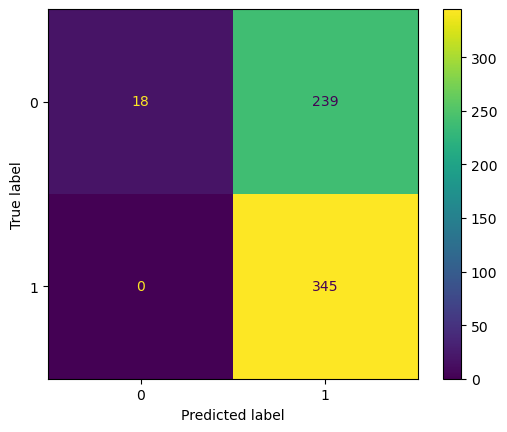

In [256]:
cm = confusion_matrix(y_test, y_pred, labels= svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

***PRIMEROS RESULTADOS***

In [257]:
print('Accuracy en entrenamiento - arbol_de_decision  : {:.4f}'.format(arbol_train_accuracy))
print('Accuracy en test          - arbol_de_decision  : {:.4f}'.format(arbol_test_accuracy))

print('F1_Score en entrenamiento - Arbol_de_decision  : {:.4f}'.format(arbol_train_f1_score))
print('F1_Score en test          - Arbol_de_decision  : {:.4f}'.format(arbol_test_f1_score))
print("")
print('Accuracy en entrenamiento - random_forest      : {:.4f}'.format(rf_train_accuracy))
print('Accuracy en test          - random_forest      : {:.4f}'.format(rf_test_accuracy))

print('F1_Score en entrenamiento - random_forest      : {:.4f}'.format(rf_train_f1_score))
print('F1_Score en test          - random_forest      : {:.4f}'.format(rf_test_f1_score))
print("")
print('Accuracy en entrenamiento - k_vecinos          : {:.4f}'.format(knn_train_accuracy))
print('Accuracy en test          - k_vecinos          : {:.4f}'.format(knn_test_accuracy))

print('F1_Score en entrenamiento - k_vecinos          : {:.4f}'.format(knn_train_f1_score))
print('F1_Score en test          - k_vecinos          : {:.4f}'.format(knn_test_f1_score))
print("")
print('Accuracy en entrenamiento - regresion_logistica: {:.4f}'.format(logreg_train_accuracy))
print('Accuracy en test          - regresion_logistica: {:.4f}'.format(logreg_test_accuracy))

print('F1_Score                  - regresion_logistica: {:.4f}'.format(logreg_train_f1_score))
print('F1_Score                  - regresion_logistica: {:.4f}'.format(logreg_test_f1_score))
print("")
print('Accuracy en entrenamiento - SVC                : {:.4f}'.format(svc_train_accuracy))
print('Accuracy en test          - SVC                : {:.4f}'.format(svc_test_accuracy))

print('F1_Score en entrenamiento - SVC                : {:.4f}'.format(svc_train_f1_score))
print('F1_Score en test          - SVC                : {:.4f}'.format(svc_test_f1_score))


Accuracy en entrenamiento - arbol_de_decision  : 0.8502
Accuracy en test          - arbol_de_decision  : 0.8571
F1_Score en entrenamiento - Arbol_de_decision  : 0.8691
F1_Score en test          - Arbol_de_decision  : 0.8724

Accuracy en entrenamiento - random_forest      : 0.8381
Accuracy en test          - random_forest      : 0.8571
F1_Score en entrenamiento - random_forest      : 0.8598
F1_Score en test          - random_forest      : 0.8761

Accuracy en entrenamiento - k_vecinos          : 0.8502
Accuracy en test          - k_vecinos          : 0.7608
F1_Score en entrenamiento - k_vecinos          : 0.8691
F1_Score en test          - k_vecinos          : 0.7955

Accuracy en entrenamiento - regresion_logistica: 0.8923
Accuracy en test          - regresion_logistica: 0.8721
F1_Score                  - regresion_logistica: 0.9063
F1_Score                  - regresion_logistica: 0.8869

Accuracy en entrenamiento - SVC                : 0.8937
Accuracy en test          - SVC             

*EL MODELO QUE MEJOR RESULTADOS OBTUVO FUE EL DE REGRESIÓN LOGISTICA, TANTO EN FUNCION DE ACCURACY Y F1_SCORE, YA QUE ES UN MODELO QUE ENCUENTRA RELACIONES ENTRE DOS FACTORES DE DATOS, ES EL QUE MEJOR SE AJUSTA A LAS NECESIDADES.*

***METODOS DE VALIDACIÓN***

**LooCV**

In [258]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [259]:
df_ultimate.head(3)

Peleador1       Peleador2  Pelea_x_titulo  Diff_racha_d  \
0           Kamaru Usman  Jorge Masvidal               1             0   
1  Alexander Volkanovski    Max Holloway               1             1   
2               Petr Yan       Jose Aldo               1             2   

   Diff_racha_v  Diff_mayor_racha_v  Diff_v  Diff_d  Diff_total_rounds  \
0            -8                  -7       6      -7                 27   
1            -8                   5       9       5                 42   
2            -6                   9      12       5                 53   

   Diff_peleas_x_titulo  ...  Diff_golpes_intentados_total  Diff_td_lanzados  \
0                    -2  ...                        -184.0              -5.0   
1                     6  ...                           2.0              -3.0   
2                    14  ...                        -219.0              -1.0   

   Diff_td_intentados  Diff_td_porcentaje  Diff_sub_intentados  Diff_ppv  \
0               -16.0               -0.31                  0.0      -2.0   
1                -9.0               -0.33                  0.0       0.0   
2                -1.0               -0.50                  0.0      -1.0   

   Diff_oposicion  Diff_postura  P1 gano  P2 gano  
0             0.0             2        1        0  
1             0.0             0        1        0  
2             0.0             2        1        0  

[3 rows x 43 columns]

In [260]:
df_ultimate.columns

Index(['Peleador1', 'Peleador2', 'Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'win_by_Decision_Majority_diff',
       'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff',
       'win_by_TKO_Doctor_Stoppage_diff', 'Diff_apuestas',
       'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura', 'P1 gano', 'P2 gano'],
      dtype='object')

In [261]:
X_loocv = df_ultimate[['Pelea_x_titulo', 'Diff_racha_d',
       'Diff_racha_v', 'Diff_mayor_racha_v', 'Diff_v', 'Diff_d',
       'Diff_total_rounds', 'Diff_peleas_x_titulo', 'ko_dif', 'sub_dif',
       'Diff_altura', 'Diff_alcance', 'Diff_edad', 'Diff_striking',
       'Diff_avg_sub_intentos', 'Diff_avg_td', 'Mejor_rango', 'Diff_empates',
       'Diff_striking_porcentaje', 'win_by_Decision_Majority_diff',
       'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff',
       'win_by_TKO_Doctor_Stoppage_diff', 'Diff_apuestas',
       'Diff_valor_esperado', 'Diff_peso', 'Diff_knockdowns',
       'Diff_golpes_lanzados_sig', 'Diff_golpes_intentados_sig',
       'Diff_golpes_porcentaje', 'Diff_golpes_lanzados_total',
       'Diff_golpes_intentados_total', 'Diff_td_lanzados',
       'Diff_td_intentados', 'Diff_td_porcentaje', 'Diff_sub_intentados',
       'Diff_ppv', 'Diff_oposicion', 'Diff_postura']].values   
y_loocv = df_ultimate['P1 gano'].values    

print(X_loocv.shape, y_loocv.shape)

(2004, 39) (2004,)


In [262]:
cv = LeaveOneOut()

In [263]:
# REGRESIÓN LOGÍSTICA
model = LogisticRegression(C=100,solver='newton-cg').fit(X_train,y_train)

In [264]:
scores = cross_val_score(model, X_loocv, y_loocv, scoring='accuracy', cv=cv, n_jobs=2)
print(scores)


[1. 1. 1. ... 1. 1. 1.]


In [265]:
print(f'Accuracy en LOOCV: {scores.mean().round(2)} +/- {scores.std().round(2)}')

Accuracy en LOOCV: 0.88 +/- 0.33


**GridSearchCV**

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [267]:
param_grid = {
    'C': [0.1, 1, 10], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  
}

In [268]:
logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

In [269]:
X_GS = df_ultimate.drop(['Peleador1', 'Peleador2', 'P1 gano', 'P2 gano'], axis=1)
y_GS = df_ultimate['P1 gano']

X_train_GS, X_test_GS, y_train_GS, y_test_GS = train_test_split(X_GS, y_GS, random_state=0)

In [270]:
grid_search.fit(X_train_GS, y_train_GS)

c:\Users\nicos\anaconda3\envs\Nicolas2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nicos\anaconda3\envs\Nicolas2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [271]:
print("Mejores parametros: " + str(grid_search.best_params_))
print("Mejor Score: " + str(grid_search.best_score_) + '\n')

Mejores parametros: {'C': 1, 'solver': 'newton-cg'}
Mejor Score: 0.8795946843853819



In [272]:
scores = pd.DataFrame(grid_search.cv_results_)
scores

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.346788      0.137728         0.009394        0.007333     0.1   
1        0.247647      0.133204         0.014391        0.009216     0.1   
2        0.057964      0.012024         0.006995        0.001094     0.1   
3        0.166498      0.012699         0.005398        0.000798     0.1   
4        0.229860      0.024609         0.006930        0.002341     0.1   
5        0.381964      0.103718         0.006396        0.001199       1   
6        0.115330      0.029106         0.006595        0.001355       1   
7        0.065760      0.010565         0.005596        0.000799       1   
8        0.165498      0.021112         0.007197        0.001600       1   
9        0.214357      0.017133         0.008596        0.003381       1   
10       0.454119      0.070929         0.007795        0.004305      10   
11       0.137284      0.091778         0.006995        0.003160      10   
12       0.078153      0.017848         0.005997        0.001095      10   
13       0.149906      0.012271         0.006598        0.001200      10   
14       0.286225      0.067816         0.023386        0.026999      10   

   param_solver                             params  split0_test_score  \
0     newton-cg  {'C': 0.1, 'solver': 'newton-cg'}           0.880399   
1         lbfgs      {'C': 0.1, 'solver': 'lbfgs'}           0.873754   
2     liblinear  {'C': 0.1, 'solver': 'liblinear'}           0.880399   
3           sag        {'C': 0.1, 'solver': 'sag'}           0.810631   
4          saga       {'C': 0.1, 'solver': 'saga'}           0.797342   
5     newton-cg    {'C': 1, 'solver': 'newton-cg'}           0.873754   
6         lbfgs        {'C': 1, 'solver': 'lbfgs'}           0.873754   
7     liblinear    {'C': 1, 'solver': 'liblinear'}           0.877076   
8           sag          {'C': 1, 'solver': 'sag'}           0.810631   
9          saga         {'C': 1, 'solver': 'saga'}           0.797342   
10    newton-cg   {'C': 10, 'solver': 'newton-cg'}           0.873754   
11        lbfgs       {'C': 10, 'solver': 'lbfgs'}           0.873754   
12    liblinear   {'C': 10, 'solver': 'liblinear'}           0.873754   
13          sag         {'C': 10, 'solver': 'sag'}           0.810631   
14         saga        {'C': 10, 'solver': 'saga'}           0.797342   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.877076           0.853821           0.863333   
1            0.870432           0.840532           0.853333   
2            0.873754           0.853821           0.866667   
3            0.807309           0.780731           0.803333   
4            0.807309           0.774086           0.773333   
5            0.870432           0.863787           0.863333   
6            0.877076           0.823920           0.853333   
7            0.870432           0.863787           0.863333   
8            0.807309           0.780731           0.803333   
9            0.803987           0.774086           0.773333   
10           0.867110           0.867110           0.863333   
11           0.877076           0.847176           0.846667   
12           0.867110           0.863787           0.863333   
13           0.807309           0.780731           0.803333   
14           0.803987           0.774086           0.773333   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.920000         0.878926        0.022654                4  
1            0.886667         0.864944        0.016189                9  
2            0.920000         0.878928        0.022345                2  
3            0.840000         0.808401        0.018952               10  
4            0.836667         0.797748        0.023504               13  
5            0.926667         0.879595        0.023867                1  
6            0.903333         0.866283        0.026485                8  
7            0.92

In [273]:
param_grid = {
    'C': [0.1, 1, 10], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  
}

logistic_regression = LogisticRegression()

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

X_GS = df_ultimate.drop(['Peleador1', 'Peleador2', 'P1 gano', 'P2 gano'], axis=1)
y_GS = df_ultimate['P1 gano']

X_train, X_test, y_train, y_test = train_test_split(X_GS, y_GS, random_state=0)

grid_search.fit(X_train, y_train)

print("Mejores parametros: " + str(grid_search.best_params_))
print("Mejor Score: " + str(grid_search.best_score_) + '\n')

scores = pd.DataFrame(grid_search.cv_results_)

ad2 = grid_search.best_estimator_
gscv_train_pred = ad2.predict(X_train)
gscv_test_pred = ad2.predict(X_test)

c:\Users\nicos\anaconda3\envs\Nicolas2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nicos\anaconda3\envs\Nicolas2023\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Mejores parametros: {'C': 1, 'solver': 'newton-cg'}
Mejor Score: 0.8795946843853819



In [274]:
ad2 = grid_search.best_estimator_

gscv_train_pred = ad2.predict(X_train_GS)
gscv_test_pred = ad2.predict(X_test_GS)

In [275]:
ad2_train_accuracy = accuracy_score(y_train_GS,gscv_train_pred)
ad2_test_accuracy = accuracy_score(y_test_GS, gscv_test_pred)
   
ad2_train_f1_score = f1_score(y_train_GS,gscv_train_pred)
ad2_test_f1_score = f1_score(y_test_GS, gscv_test_pred)


print("Accuracy en entrenamiento - GrdSearchCV - Regresión Logística: {:.4f}".format(ad2_train_accuracy))
print("Accuracy en test - GrdSearchCV - Regresión Logística:          {:.4f}".format(ad2_test_accuracy))
print("F1-score en entrenamiento - GrdSearchCV - Regresión Logística: {:.4f}".format(ad2_train_f1_score))
print("F1-score en test - GrdSearchCV - Regresión Logística:          {:.4f}".format(ad2_test_f1_score ))

Accuracy en entrenamiento - GrdSearchCV - Regresión Logística: 0.8896
Accuracy en test - GrdSearchCV - Regresión Logística:          0.8703
F1-score en entrenamiento - GrdSearchCV - Regresión Logística: 0.9028
F1-score en test - GrdSearchCV - Regresión Logística:          0.8900


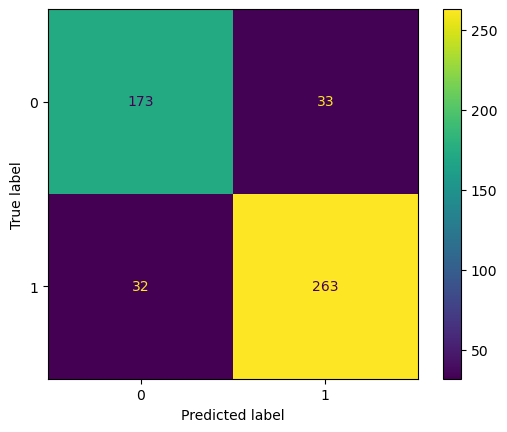

In [276]:
cm_GSCV = confusion_matrix(y_test_GS,gscv_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GSCV)
disp.plot()

**ADABOOST**

In [277]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [278]:
X_ADA = df_ultimate.drop(['Peleador1', 'Peleador2','P1 gano','P2 gano'], axis=1) 
y_ADA = df_ultimate['P1 gano'] 

In [279]:
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_ADA, y_ADA, test_size=0.3)

In [280]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [281]:
model_ada = ada.fit(X_train_ada, y_train_ada)

In [282]:
y_train_pred_ada = model_ada.predict(X_train_ada)
y_test_pred_ada = model_ada.predict(X_test_ada)

In [283]:
ada_train_accuracy = accuracy_score(y_train_ada,y_train_pred_ada)
ada_test_accuracy = accuracy_score(y_test_ada, y_test_pred_ada)
   
ada_train_f1_score = f1_score(y_train_ada,y_train_pred_ada)
ada_test_f1_score = f1_score(y_test_ada, y_test_pred_ada)

print("Accuracy en Entrenamiento - AdaBoost   : {:.4f}".format(ada_train_accuracy))
print("Accuracy en Test - AdaBoost            : {:.4f}".format(ada_test_accuracy))
print("F1_score  en Entrenamiento - Adaboost  : {:.4f}".format(ada_train_f1_score))
print("F1_score en Test - Adaboost            : {:.4f}".format(ada_test_f1_score))

Accuracy en Entrenamiento - AdaBoost   : 0.8823
Accuracy en Test - AdaBoost            : 0.8372
F1_score  en Entrenamiento - Adaboost  : 0.8978
F1_score en Test - Adaboost            : 0.8612


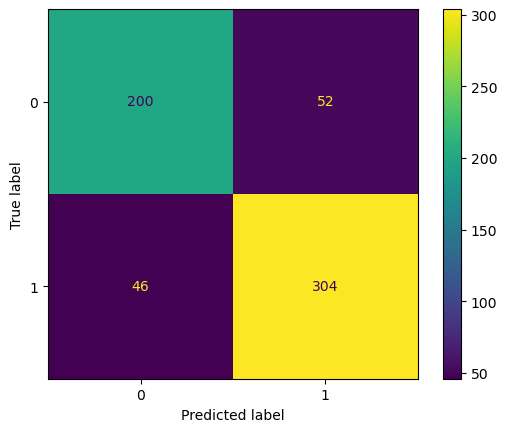

In [284]:
cm_ADA = confusion_matrix(y_test_ada, y_test_pred_ada, labels= ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ADA,
                              display_labels=ada.classes_)
disp.plot()
plt.show()

**GRADIENT BOOSTING**

In [285]:
X_GB = df_ultimate.drop(['Peleador1', 'Peleador2','P1 gano','P2 gano'], axis=1) 
y_GB = df_ultimate['P1 gano']

In [286]:
X_train_GB, X_test_GB, y_train_GB, y_test_GB = train_test_split(X_GB, y_GB, random_state = 42)

In [287]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 42)

In [288]:
gbrt.fit(X_train_GB, y_train_GB)

GradientBoostingClassifier(random_state=42)

In [289]:
y_train_pred_GB = gbrt.predict(X_train_GB)
y_test_pred_GB = gbrt.predict(X_test_GB)

In [290]:
from sklearn.metrics import accuracy_score
GB_train_accuracy = accuracy_score(y_train_GB,y_train_pred_GB)
GB_test_accuracy = accuracy_score(y_test_GB, y_test_pred_GB)
   
GB_train_f1_score = f1_score(y_train_GB,y_train_pred_GB)
GB_test_f1_score = f1_score(y_test_GB, y_test_pred_GB)


print('Accuracy en entrenamiento - Gradient Boost: {0:0.4f}'.format(GB_train_accuracy))
print('Accuracy en Test - Gradient Boost         : {0:0.4f}'.format(GB_test_accuracy))
print('F1_Score en entrenamiento - Gradient Boost: {0:0.4f}'.format(GB_train_f1_score))
print('F1_Score en Test - Gradient Boost         : {0:0.4f}'.format(GB_test_f1_score))

Accuracy en entrenamiento - Gradient Boost: 0.9315
Accuracy en Test - Gradient Boost         : 0.8683
F1_Score en entrenamiento - Gradient Boost: 0.9410
F1_Score en Test - Gradient Boost         : 0.8821


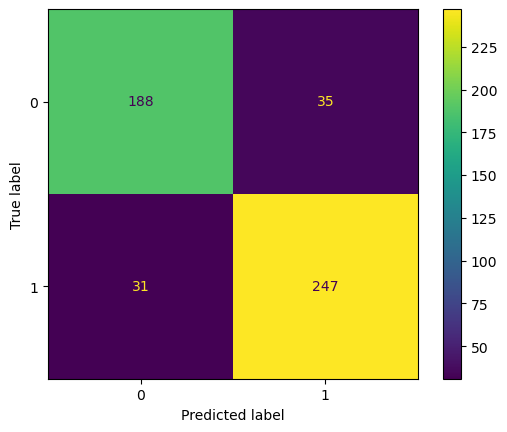

In [291]:
cm_GB = confusion_matrix(y_test_GB, y_test_pred_GB, labels= gbrt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB,
                              display_labels=gbrt.classes_)
disp.plot()
plt.show()

**LightGBM**

In [292]:
X_LGBM = df_ultimate.drop(['Peleador1', 'Peleador2','P1 gano','P2 gano'], axis=1) 
y_LGBM = df_ultimate['P1 gano']

In [293]:
X_train_LGBM, X_test_LGBM, y_train_LGBM, y_test_LGBM = train_test_split(X_LGBM, y_LGBM, test_size = 0.3, random_state = 42)

In [294]:
import lightgbm as lgb 
clf = lgb.LGBMClassifier()
clf.fit(X_train_LGBM, y_train_LGBM)
y_train_pred_LGBM = clf.predict(X_train_LGBM)
y_test_pred_LGBM = clf.predict(X_test_LGBM)

[LightGBM] [Info] Number of positive: 810, number of negative: 592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2835
[LightGBM] [Info] Number of data points in the train set: 1402, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.577746 -> initscore=0.313528
[LightGBM] [Info] Start training from score 0.313528


In [295]:
from sklearn.metrics import accuracy_score
LGBM_train_accuracy = accuracy_score(y_train_LGBM,y_train_pred_LGBM)
LGBM_test_accuracy = accuracy_score(y_test_LGBM, y_test_pred_LGBM)
   
LGBM_train_f1_score = f1_score(y_train_LGBM,y_train_pred_LGBM)
LGBM_test_f1_score = f1_score(y_test_LGBM, y_test_pred_LGBM)

print('LightGBM accuracy en entrenamiento: {0:0.4f}'.format(LGBM_train_accuracy))
print('LightGBM accuracy en Test         : {0:0.4f}'.format(LGBM_test_accuracy))
print('LightGBM F1-score en entrenamiento: {0:0.4f}'.format(LGBM_train_f1_score))
print('LightGBM F1-score en Test         : {0:0.4f}'.format(LGBM_test_f1_score))

LightGBM accuracy en entrenamiento: 1.0000
LightGBM accuracy en Test         : 0.8571
LightGBM F1-score en entrenamiento: 1.0000
LightGBM F1-score en Test         : 0.8728


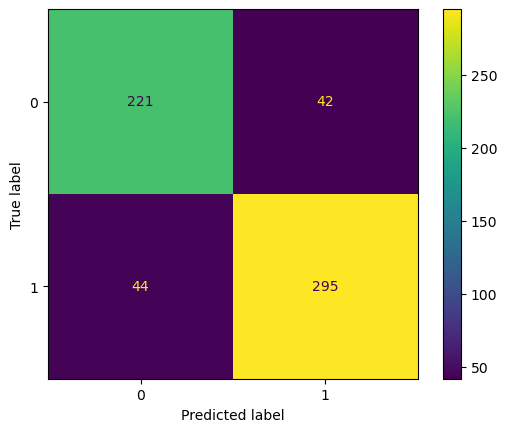

In [296]:
cm = confusion_matrix(y_test_LGBM, y_test_pred_LGBM, labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

**XGBOOST**

In [297]:
import xgboost as xgb

In [298]:
X_XGB = df_ultimate.drop(['Peleador1', 'Peleador2','P1 gano','P2 gano'],axis=1)
y_XGB= df_ultimate['P1 gano']

X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, y_XGB, test_size = 0.3, random_state=42)

In [299]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

In [300]:
clf_xgb.fit(X_train_XGB,y_train_XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [301]:
y_train_pred_XGB = clf_xgb.predict(X_train_XGB)
y_test_pred_XGB = clf_xgb.predict(X_test_XGB)

In [302]:
XGB_train_accuracy = accuracy_score(y_train_XGB,y_train_pred_XGB)
XGB_test_accuracy = accuracy_score(y_test_XGB, y_test_pred_XGB)
   
XGB_train_f1_score = f1_score(y_train_XGB,y_train_pred_XGB)
XGB_test_f1_score = f1_score(y_test_XGB, y_test_pred_XGB)

print('LightGBM accuracy en entrenamiento: {0:0.4f}'.format(XGB_train_accuracy))
print('LightGBM accuracy en Test         : {0:0.4f}'.format(XGB_test_accuracy))
print('LightGBM F1-score en entrenamiento: {0:0.4f}'.format(XGB_train_f1_score))
print('LightGBM F1-score en Test         : {0:0.4f}'.format(XGB_test_f1_score))

LightGBM accuracy en entrenamiento: 0.9636
LightGBM accuracy en Test         : 0.8455
LightGBM F1-score en entrenamiento: 0.9684
LightGBM F1-score en Test         : 0.8642


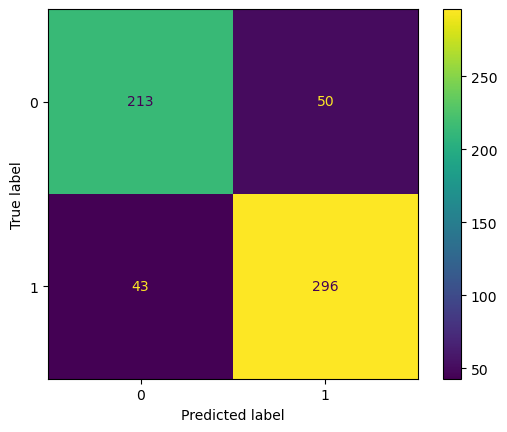

In [303]:
cm = confusion_matrix(y_test_XGB, y_test_pred_XGB, labels= clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

***RESUMEN***

In [304]:
print("ULTIMOS MODELOS")
print("")
print('Accuracy en entrenamiento               - random_forest: {:.4f}'.format(arbol_train_accuracy))
print('Accuracy en test                        - random_forest: {:.4f}'.format(arbol_test_accuracy))
print('F1_score en entrenamiento               - random_forest: {0:0.4f}'.format(arbol_train_f1_score))
print('F1_score en test                        - random forest: {0:0.4f}'.format(arbol_test_f1_score))
print("")
#print(f'Accuracy en LOOCV                                     : {scores.mean().round(2)} +/- {scores.std().round(2)}')
#print(f'Accuracy en                            - LOOCV        : {scores.mean().round(2)} +/- {scores.std().round(2)}')
print("")
print("Accuracy en entrenamiento - GrdSearchCV - Regresión Logística: {:.4f}".format(ad2_train_accuracy))
print("Accuracy en test          - GrdSearchCV - Regresión Logística: {:.4f}".format(ad2_test_accuracy))
print("F1-score en entrenamiento - GrdSearchCV - Regresión Logística: {:.4f}".format(ad2_train_f1_score))
print("F1-score en test          - GrdSearchCV - Regresión Logística: {:.4f}".format(ad2_test_f1_score))
print("")
print("Accuracy en Entrenamiento                - AdaBoost    : {:.4f}".format(ada_train_accuracy))
print("Accuracy en Test                         - AdaBoost    : {:.4f}".format(ada_test_accuracy))
print("F1_score  en Entrenamiento               - Adaboost    : {:.4f}".format(ada_train_f1_score))
print("F1_score en Test                         - Adaboost    : {:.4f}".format(ada_test_f1_score))
print("")
print('Accuracy en entrenamiento              - Gradient Boost: {0:0.4f}'.format(GB_train_accuracy))
print('Accuracy en Test                       - Gradient Boost: {0:0.4f}'.format(GB_test_accuracy))
print('F1_Score en entrenamiento              - Gradient Boost: {0:0.4f}'.format(GB_train_f1_score))
print('F1_Score en Test                       - Gradient Boost: {0:0.4f}'.format(GB_test_f1_score))
print("")
print('Accuracy en entrenamiento              - LightGBM      : {0:0.4f}'.format(LGBM_train_accuracy))
print('Accuracy en Test                       - LightGBM      : {0:0.4f}'.format(LGBM_test_accuracy))
print('F1-score en entrenamiento              - LightGBM      : {0:0.4f}'.format(LGBM_train_f1_score))
print('F1-score en Test                       - LightGBM      : {0:0.4f}'.format(LGBM_test_f1_score))
print("")
print('Accuracy en Entrenamiento              - XGB           : {0:0.4f}'.format(XGB_train_accuracy))
print('Accuracy en Test                       - XGB           : {0:0.4f}'.format(XGB_test_accuracy))
print('F1_score en Entrenamiento              - XGB           : {0:0.4f}'.format(XGB_train_f1_score))
print('F1_score en Test                       - XGB           : {0:0.4f}'.format(XGB_test_f1_score))
print("")
print("PRIMEROS MODELOS")
print("")
print('Accuracy en entrenamiento - arbol_de_decision  : {:.4f}'.format(arbol_train_accuracy))
print('Accuracy en test          - arbol_de_decision  : {:.4f}'.format(arbol_test_accuracy))

print('F1_Score en entrenamiento - Arbol_de_decision  : {:.4f}'.format(arbol_train_f1_score))
print('F1_Score en test          - Arbol_de_decision  : {:.4f}'.format(arbol_test_f1_score))
print("")
print('Accuracy en entrenamiento - random_forest      : {:.4f}'.format(rf_train_accuracy))
print('Accuracy en test          - random_forest      : {:.4f}'.format(rf_test_accuracy))

print('F1_Score en entrenamiento - random_forest      : {:.4f}'.format(rf_train_f1_score))
print('F1_Score en test          - random_forest      : {:.4f}'.format(rf_test_f1_score))
print("")
print('Accuracy en entrenamiento - k_vecinos          : {:.4f}'.format(knn_train_accuracy))
print('Accuracy en test          - k_vecinos          : {:.4f}'.format(knn_test_accuracy))

print('F1_Score en entrenamiento - k_vecinos          : {:.4f}'.format(knn_train_f1_score))
print('F1_Score en test          - k_vecinos          : {:.4f}'.format(knn_test_f1_score))
print("")
print('Accuracy en entrenamiento - regresion_logistica: {:.4f}'.format(logreg_train_accuracy))
print('Accuracy en test          - regresion_logistica: {:.4f}'.format(logreg_test_accuracy))

print('F1_Score                  - regresion_logistica: {:.4f}'.format(logreg_train_f1_score))
print('F1_Score                  - regresion_logistica: {:.4f}'.format(logreg_test_f1_score))
print("")
print('Accuracy en entrenamiento - SVC                : {:.4f}'.format(svc_train_accuracy))
print('Accuracy en test          - SVC                : {:.4f}'.format(svc_test_accuracy))

print('F1_Score en entrenamiento - SVC                : {:.4f}'.format(svc_train_f1_score))
print('F1_Score en test          - SVC                : {:.4f}'.format(svc_test_f1_score))

ULTIMOS MODELOS

Accuracy en entrenamiento               - random_forest: 0.8502
Accuracy en test                        - random_forest: 0.8571
F1_score en entrenamiento               - random_forest: 0.8691
F1_score en test                        - random forest: 0.8724


Accuracy en entrenamiento - GrdSearchCV - Regresión Logística: 0.8896
Accuracy en test          - GrdSearchCV - Regresión Logística: 0.8703
F1-score en entrenamiento - GrdSearchCV - Regresión Logística: 0.9028
F1-score en test          - GrdSearchCV - Regresión Logística: 0.8900

Accuracy en Entrenamiento                - AdaBoost    : 0.8823
Accuracy en Test                         - AdaBoost    : 0.8372
F1_score  en Entrenamiento               - Adaboost    : 0.8978
F1_score en Test                         - Adaboost    : 0.8612

Accuracy en entrenamiento              - Gradient Boost: 0.9315
Accuracy en Test                       - Gradient Boost: 0.8683
F1_Score en entrenamiento              - Gradient Boost: 0.

In [305]:
accuracies_entrenamiento = [arbol_train_accuracy,rf_train_accuracy,knn_train_accuracy,logreg_train_accuracy,svc_train_accuracy,ad2_train_accuracy,ada_train_accuracy, GB_train_accuracy,LGBM_train_accuracy,XGB_train_accuracy] 
accuracies_evaluacion = [arbol_test_accuracy,rf_test_accuracy,knn_test_accuracy,logreg_test_accuracy,svc_test_accuracy,ad2_test_accuracy,ada_test_accuracy, GB_test_accuracy,LGBM_test_accuracy,XGB_test_accuracy] 
f1_scores_entrenamiento = [arbol_train_f1_score,rf_train_f1_score,knn_train_f1_score,logreg_train_f1_score,svc_train_f1_score,ad2_train_f1_score,ada_train_f1_score, GB_train_f1_score,LGBM_train_f1_score,XGB_train_f1_score]
f1_scores_evaluacion = [arbol_test_f1_score,rf_test_f1_score,knn_test_f1_score,logreg_test_f1_score,svc_test_f1_score,ad2_test_f1_score,ada_test_f1_score, GB_test_f1_score,LGBM_test_f1_score,XGB_test_f1_score]  

modelos = ['Decision Tree','Random Forest','KNN','Regresión Logística','SVM','GridSearchCV','ADA','Gradient','LightGBM','XGB']

modelos_info = pd.DataFrame([accuracies_entrenamiento,accuracies_evaluacion,f1_scores_entrenamiento,f1_scores_evaluacion], columns = modelos, index = ['Acc Training','Acc Test', 'F1_score Training', 'F1_Score Test']).T


In [306]:
modelos_info.style.background_gradient(cmap='Blues',axis=0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

<Figure size 640x480 with 0 Axes>

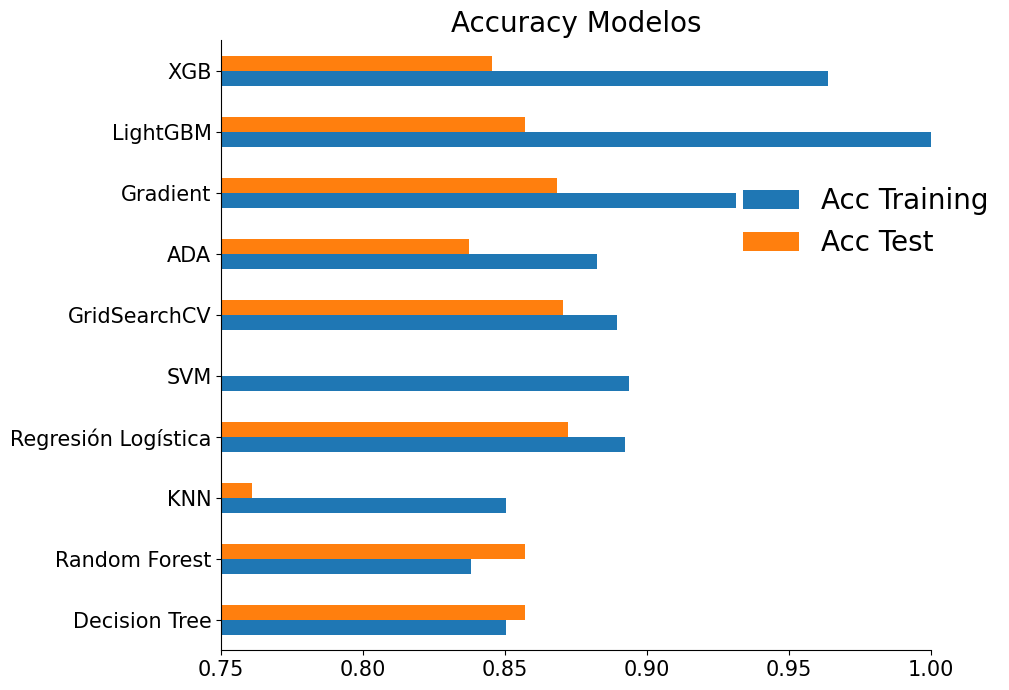

In [307]:
modelos_info[['Acc Training','Acc Test']].plot.barh(figsize=(10,7))
plt.legend(frameon=False,bbox_to_anchor=(0.7,0.8), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.75,1]);
plt.title('Accuracy Modelos',size=20)
sns.despine(top=True)
plt.tight_layout()

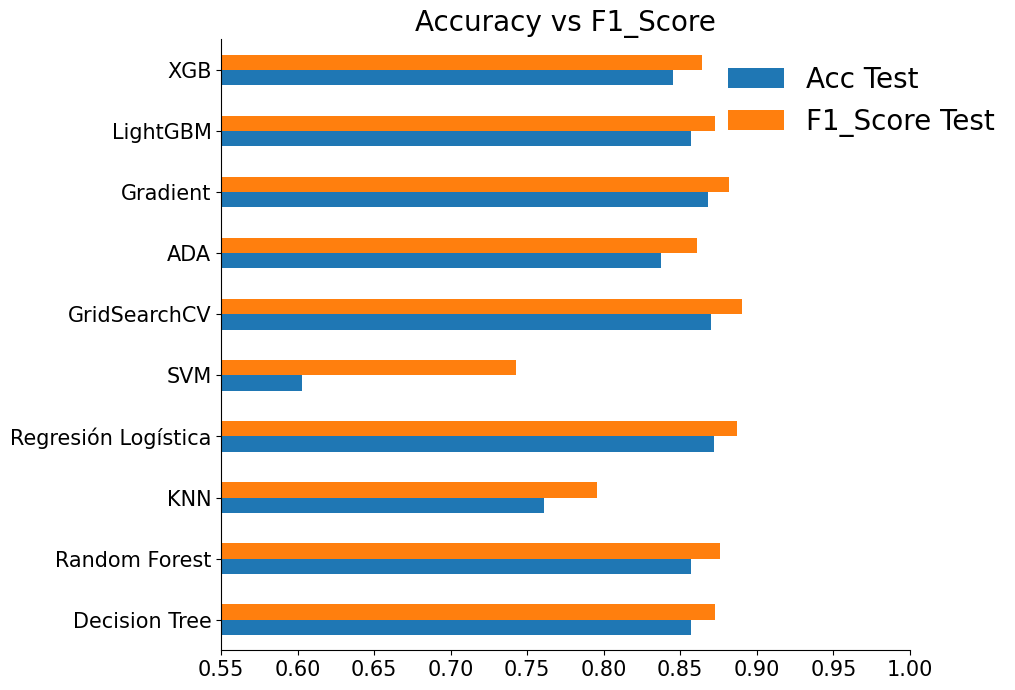

In [308]:
modelos_info[['Acc Test','F1_Score Test']].plot.barh(figsize=(10,7))
plt.legend(frameon=False,bbox_to_anchor=(0.7,0.8), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.55,1]);
plt.title('Accuracy vs F1_Score',size=20)
sns.despine(top=True)
plt.tight_layout()

***EL CONJUNTO DE VARIABLES QUE MAS INCIDEN EN SI UN LUCHADOR GANA O PIERDE SON LAS VARIABLES RELACIONADAS A LAS HABILIDADES QUE COMPETEN AL STRIKING, TAKEDOWNS, SUMISIONES Y OPOSICIÓN. NO OBSTANTE LOS LUCHADORES QUE ESTAN ARRIBA EN LAS APUESTAS SON LOS QUE EN LA MAYORÍA DE LAS VECES GANARON AL IGUAL QUE LOS LUCHADORES QUE TIENEN UN VALOR ESPERADO(GANANCIAS OBTENIDAS POR GANADOR) MAS ALTO, SON LOS QUE EN LA GRAN CANTIDAD DE LOS CASOS SALIERON VICTORIOSOS.***
